# Solution Graded Exercise 8: Hopfield Network model of associative memory

first name: Nicolas

last name: Lesimple

sciper: 237699

date: 26.03.2018

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex8_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# Exercise 8.1. Getting started

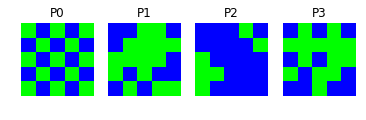

C:\Users\nicol\Miniconda2\envs\biomodel\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


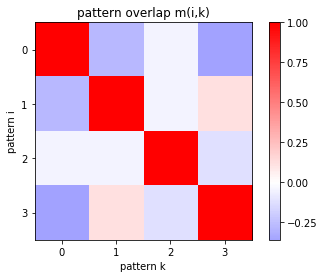

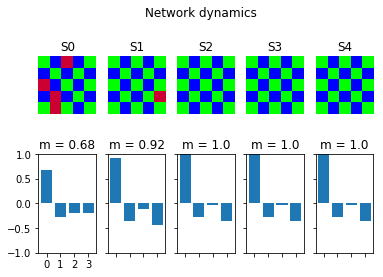

In [2]:
%matplotlib inline
import random
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import matplotlib.pyplot as plt

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


# 8.3. Exercise: N=4x4 Hopfield-network
## 8.3.1. Question: Storing a single pattern
#### [2 + 2 + 3 points]

8.3.1. Question: Storing a single pattern
Modify the Python code given above to implement this exercise:

1.Create a network with N=16 neurons.

2.Create a single 4 by 4 checkerboard pattern.

3.Store the checkerboard in the network.

4.Set the initial state of the network to a noisy version of the checkerboard (nr_flipped_pixels = 5).

5.Let the network dynamics evolve for 4 iterations.

6.Plot the sequence of network states along with the overlap of network state with the checkerboard.

Now test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at nr_flipped_pixels = 8, what if nr_flipped_pixels > 8 ?

In [3]:
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2) #1
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size) #2
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard] #3

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
hopfield_net.set_state_from_pattern(noisy_init_state) #4

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4) #5

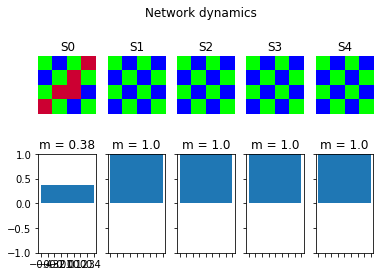

In [4]:
# Plot the sequence of network states along with the overlap of network state with the checkerboard

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics") #6

############j'arrive pas a enlever cette légende de merde !! je sais pas d'ou viennent ces chiffres

#### Now test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at nr_flipped_pixels = 8, what if nr_flipped_pixels > 8 ?

If we increase the number of flipped pixels, we find a limit where the network can still retrieve the pattern when the nr_flipped_pixels is just below. Thus the overlap between the noisy version of the pattern and the pattern become 1 after just one iteration. 
When nr_flipped_pixels is just above the limit, the network can't still retrieve the pattern and thus the overlap between the noisy version of the pattern and the pattern become -1 after one iteration. 

This limit is 8 because it is the number of neuron divided by 2. When nr_flipped_pixels is 8, the overlap stay at value 0. In fact the network try to retrieve the pattern but without success. In fact at each iteration the value of each pixel flips sign.

If we set the amount of flipped pixels to more than 8 then we never end with the pattern to retrieve. In a large majority of cases all the pixels end in the same state which is (blue (-1)) and in very rare cases we end up with a random pattern of pixels

You can see everything on the figures just below.

nr_of_flips=2


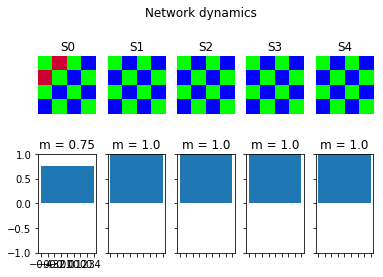

nr_of_flips=4


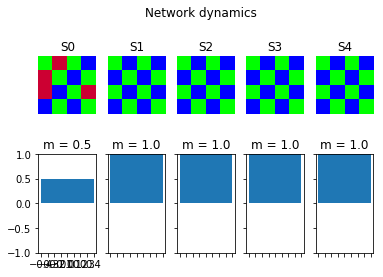

nr_of_flips=7


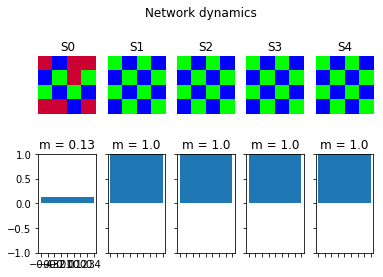

nr_of_flips=8


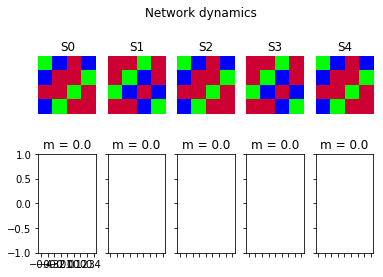

nr_of_flips=9


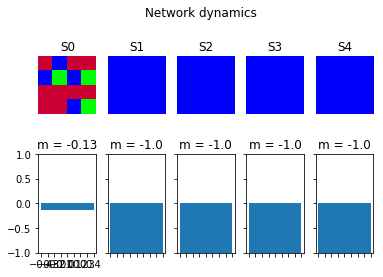

nr_of_flips=12


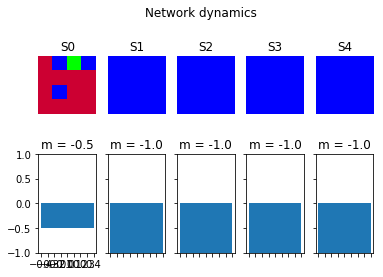

In [5]:
pattern_size = 4
nr=[2,4,7,8,9,12]

for i in range (len (nr)): 
    # create an instance of the class HopfieldNetwork
    hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2) #1
    # instantiate a pattern factory
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size) #2
    # create a checkerboard pattern and add it to the pattern list
    checkerboard = factory.create_checkerboard()
    pattern_list = [checkerboard] #3

    # create a noisy version of a pattern and use that to initialize the network
    noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=nr[i])
    hopfield_net.set_state_from_pattern(noisy_init_state) #4

    # let the hopfield network "learn" the patterns. Note: they are not stored
    # explicitly but only network weights are updated !
    hopfield_net.store_patterns(pattern_list)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=4) #5

    # Plot the sequence of network states along with the overlap of network state with the checkerboard

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    print("nr_of_flips={0}".format(nr[i]))
    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics") #6

############j'arrive pas a enlever cette légende de merde !! je sais pas d'ou viennent ces chiffres



## 8.3.2. Question: the weights matrix
#### [1 + 3 + 2 points]
The patterns a Hopfield network learns are not stored explicitly. Instead, the network learns by adjusting the weights to the pattern set it is presented during learning. Let’s visualize this.

1.Create a new 4x4 network. Do not yet store any pattern.

2.What is the size of the network matrix? The matix is 16*16.

3.Visualize the weight matrix using the function plot_tools.plot_nework_weights(). It takes the network as a parameter.

4.Create a checkerboard, store it in the network.

5.Plot the weights matrix. What weight values do occur?

6.Create a new 4x4 network

7.Create an L-shaped pattern (look at the pattern factory doc), store it in the network

8.Plot the weights matrix. What weight values do occur?

9.Create a new 4x4 network

10.Create a checkerboard and an L-shaped pattern. Store both patterns in the network

11.Plot the weights matrix. What weight values do occur? How does this matrix compare to the two previous matrices?

Text(0.5,1,u' Weights matrix with a cherckerboard pattern stored in the network')

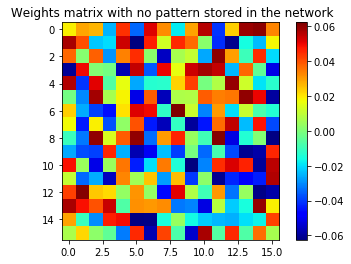

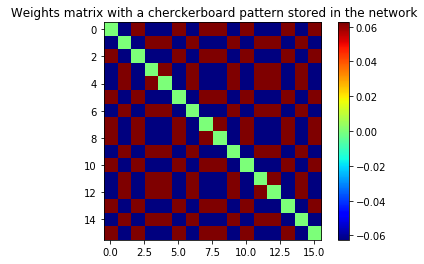

In [6]:
# write your code here: Bullet points 1-5 
pattern_size = 4 #1

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size) 
# plot the weights matrix
plt.figure()
plot_tools.plot_nework_weights(hopfield_net) #3
plt.title(' Weights matrix with no pattern stored in the network')

# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard] #4
# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)
# plot the weights matrix
plt.figure()
plot_tools.plot_nework_weights(hopfield_net)#5
plt.title(' Weights matrix with a cherckerboard pattern stored in the network')

#### Answer to the quetions :

#### 2.What is the size of the network matrix? 
The matix is 16*16.

The first weights matrix is completly random as there is no pattern stored in the network.

#### 5.Plot the weights matrix. What weight values do occur? 
With a checkerboard stored in the network, we can see that we have a dioagonal of null weights which make sense because it is just for the relation between the same neuron. Moreover, we can see that apart 0, weights takes only two values : -0.06 or 0.06. We can see that the representation of the weights are symmetric. In fact this is due to the representation we choose : a matrix 16 by 16 as we have 16 neurons. 

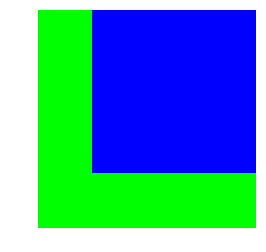

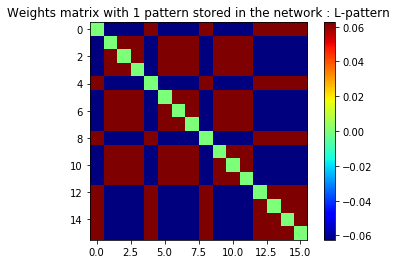

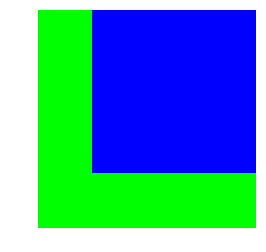

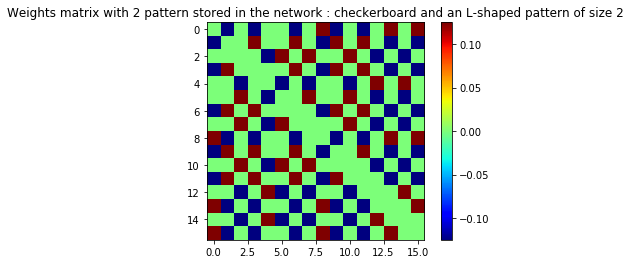

In [7]:
# write your code here: Bullet points 6-11

pattern_size = 4 #6

# create an instance of the class HopfieldNetwork
hopfield_net_L = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size) 
# create a checkerboard pattern and add it to the pattern list
L_pattern = factory.create_L_pattern()#7
pattern_list_L = [L_pattern] #7
# plot pattern
plot_tools.plot_pattern(L_pattern)
# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_L.store_patterns(pattern_list_L)
# plot the weights matrix
plt.figure()
plot_tools.plot_nework_weights(hopfield_net_L) #8
plt.title('Weights matrix with 1 pattern stored in the network : L-pattern')
plt.show()



# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2) #9
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size) 
# create a checkerboard pattern and add it to the pattern list
L_pattern = factory.create_L_pattern()
pattern_list_L2 = [L_pattern] #10
# plot pattern
plot_tools.plot_pattern(L_pattern)
checkerboard = factory.create_checkerboard()
pattern_list_L2.append(checkerboard) #10
# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list_L2)
# plot the weights matrix
plt.figure()
plot_tools.plot_nework_weights(hopfield_net) #11
plt.title('Weights matrix with 2 pattern stored in the network : checkerboard and an L-shaped pattern of size 2')
plt.show()

# A checker

#### Answer to the questions :

#### 8.Plot the weights matrix. What weight values do occur?
With the L-shaped pattern stored in the network, the weights takes only 3 values : 0 in the main diagonal and 0.06 or -0.06 everywhere else.

#### 11.Plot the weights matrix. What weight values do occur? How does this matrix compare to the two previous matrices?
With the L-shaped pattern and the checkerboard stored in the network, the weights takes only 3 values : 0 and 0.1 and -0.1. 

The weight matrix of the model with checkerboard and L-pattern stored is the sum of weights of the L-shaped model and the checkerboard model.

#### How does this matrix compare to the two previous matrices?

If we add the matrix with checkerboard stored and the matrix with L-shapped stored, we find the values of the weigths of the third matrix : the matrix with L-shapped pattern and checkerboard pattern stored.

Whereas the two first matrices looked the same. The third matrix is quite different from the first two. However the symmetric seems to have been kept as well as the central line of symetry.

## 8.3.3. Question (optional): Weights Distribution

Text(0.5,1,u' Weights matrix with 2 pattern stored in the network : checkerboard and an L-shaped pattern')

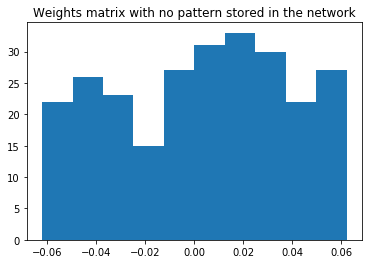

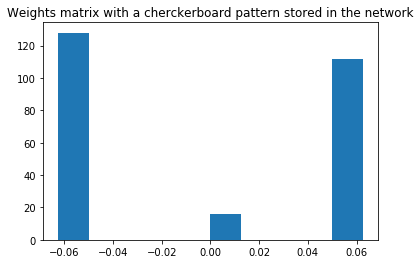

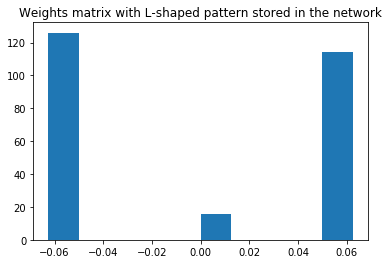

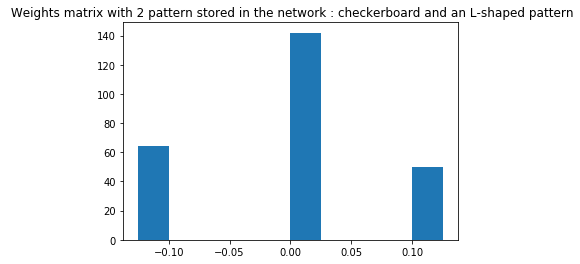

In [8]:
# You can easily plot a histogram by adding the following two lines to your script. 
#It assumes you have stored your network in the variable ‘hopfield_net’.
"""
plt.figure()
plt.hist(hopfield_net.weights.flatten())
"""

pattern_size = 4 #1

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size) 
plt.figure()
plt.hist(hopfield_net.weights.flatten())
plt.title('Weights matrix with no pattern stored in the network')

# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard] #4
# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)
plt.figure()
plt.hist(hopfield_net.weights.flatten())
plt.title('Weights matrix with a cherckerboard pattern stored in the network')

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size) 
# create a checkerboard pattern and add it to the pattern list
L_pattern = factory.create_L_pattern()#7
pattern_list = [L_pattern] #7
# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)
plt.figure()
plt.hist(hopfield_net.weights.flatten())
plt.title('Weights matrix with L-shaped pattern stored in the network')

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2) #9
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size) 
# create a checkerboard pattern and add it to the pattern list
L_pattern = factory.create_L_pattern()
pattern_list = [L_pattern] #10
checkerboard = factory.create_checkerboard()
pattern_list.append(checkerboard) #10
# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)
plt.figure()
plt.hist(hopfield_net.weights.flatten())
plt.title(' Weights matrix with 2 pattern stored in the network : checkerboard and an L-shaped pattern')

# 8.4. Exercise: Capacity of an N=100 Hopfield-network
## 8.4.1. Associative memory.
#### [2 points]

#### A Hopfield network implements so called associative or content-adressable memory. Explain what this means. (max 4 lines)

Associative or content-adressable memory is the capability of the network to recover the most resemblant stored pattern from a noisy input.

In an associative memory the stimulus of an incomplete or corrupted pattern leads to the response of a stored pattern that corresponds in some manner to the input pattern. In fact, it compares input search data against a table of stored data, and returns the matching data.

The hopfield model is based on matching patterns. These patterns are known in advance this means that, in the case of the computer, we can give then as an input. In the case of the brain this means that one has already encountered and learned a given pattern (tate, form and color of a banana) so that we can match a something we see even if information is incomplete with the learnt and memorized pattern.  

## 8.4.2. Capacity of the network.
#### [1 points]

#### Using the value $C_{store}$ given in the book, how many patterns can you store in a N=10x10 network? Use this number K in the next question:
 

We can define the storage capacity $C_{store}$  of a network as the maximal number $M_{max}$ of patterns that a network of N neurons can retrieve
$C_{store}$ = $M_{max}$/(N^2)


If we accept an error probability of Perror=0.001, we find a storage capacity of Cstore=0.105.
In our case, $M_{max}$ = K = $C_{store}$*N^2 = $C_{store}$ *100=0.105*100=10.5 patterns.

The maximal number $M_{max}$ of patterns that a network can retrieve is 10 patterns.

# attention dave a utiliser with Cstore = 0.138

## 8.4.3. Checkerboard and random patterns.
#### [3 points]

#### Create an N=10x10 network and store a checkerboard pattern together with (K-1) random patterns. Then initialize the network with the unchanged checkerboard pattern. Let the network evolve for five iterations.

Rerun your script a few times. What do you observe?

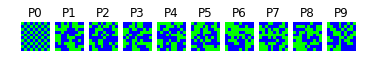

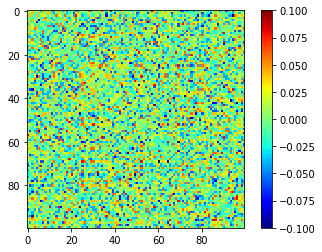

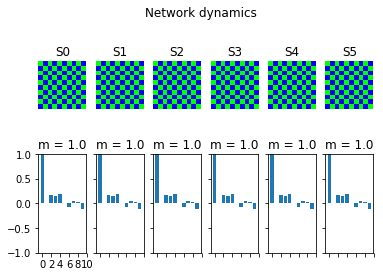

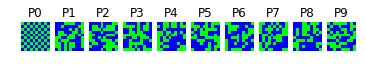

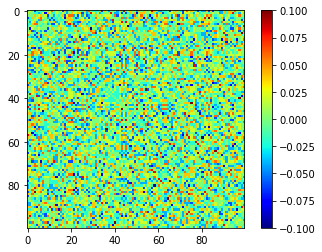

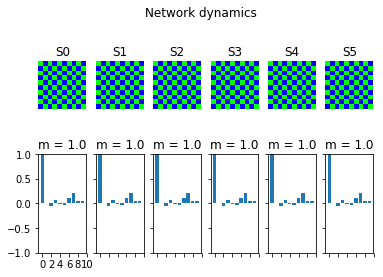

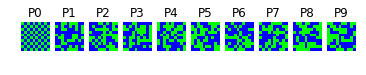

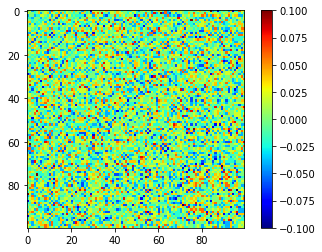

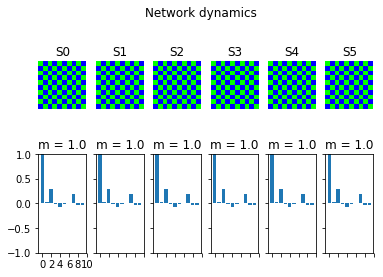

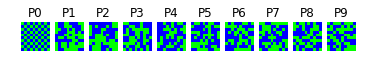

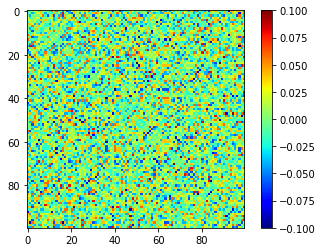

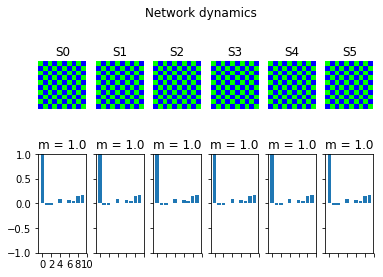

In [9]:
pattern_size = 10
K=int(0.105*(pattern_size*pattern_size))
K=K-K%1 # pour arrondir en dessous

for i in range (4): 
    # create an instance of the class HopfieldNetwork
    hopfield_net_4 = network.HopfieldNetwork(nr_neurons= pattern_size**2) 
    # instantiate a pattern factory
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size) 
    # create a checkerboard pattern and add it to the pattern list
    checkerboard = factory.create_checkerboard()
    pattern_list = [checkerboard] 
    
    #initializes the network with the first pattern
    hopfield_net_4.set_state_from_pattern(pattern_list[0])
     # add random patterns to the list
    pattern_list.extend(factory.create_random_pattern_list(nr_patterns=(K-1), on_probability=0.5))
    plot_tools.plot_pattern_list(pattern_list)
    # let the hopfield network "learn" the patterns. Note: they are not stored
    # explicitly but only network weights are updated !
    hopfield_net_4.store_patterns(pattern_list)
    
    plot_tools.plot_nework_weights(hopfield_net_4)
    
    # from this initial state, let the network dynamics evolve.
    states = hopfield_net_4.run_with_monitoring(nr_steps=5) 

    # Plot the sequence of network states along with the overlap of network state with the checkerboard
    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics") 

#### Rerun your script a few times. What do you observe? 
#### [2 points]

We see that the network always retrieves the pattern when we re-run it. 

If we initialize the model at the unchanged value then we already have the pattern so nothing happens. In fact, we initialized the network with the unchanged checkerboard which is already a store pattern. It's thus a stable fixed point.


# 8.5. Exercise: Non-random patterns
## 8.5.1. Alphabet.

#### Run the following code. Read the inline comments and look up the doc of functions you do not know.

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


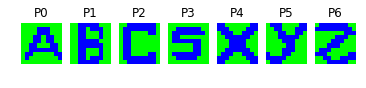

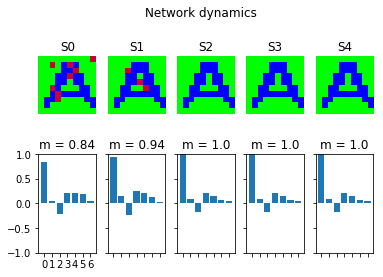

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.5.2. Add a letter.
#### [2 points]

#### Add the letter ‘R’ to the letter list and store it in the network. Is the pattern ‘A’ still a fixed point? Does the overlap between the network state and the reference pattern ‘A’ always decrease?

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


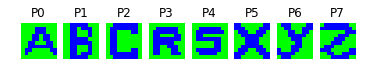

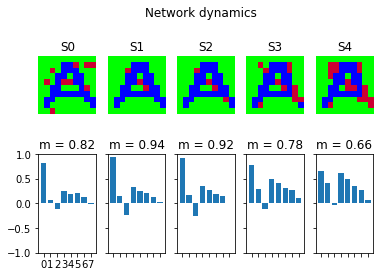

In [11]:
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C','R', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

#### [3 points]

#### Is the pattern ‘A’ still a fixed point?
A is not a fixed point when R is added to the list. In fact we can see that when R is not present, the overlap is 1 after one iteration and thus the pattern is retrieve after one iteration and stay retrieve for the other iteration.
On the contrary, when R is added, the pattern A is never retrieve if we have noise at the begining. We can see that thanks to the values of the overlap in the second case.
This can be explain by the fact that the letter R is similar to input pattern.
#### Does the overlap between the network state and the reference pattern ‘A’ always decrease? (max 3 lines)
The overlap between the network state and the reference pattern A increases at the first iteration. Then, we can say yes as we can see on the overlap values, overlap between the network state and the reference pattern ‘A’ always decrease  for all other iterations. In fact it makes sense because as we saw in course, pattern A is not a fixed point anymore. Thus it can't be retrieve and thus the overlap will deacrease. It's the same idea as we saw in the course for the energy :  energy decreases, if neuron k changes. 

## 8.5.3. Capacity.
#### [3 points]

#### Make a guess of how many letters the network can store. Then create a (small) set of letters. Check if all letters of your list are fixed points under the network dynamics. Explain the discrepancy between the network capacity C (computed above) and your observation.



the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


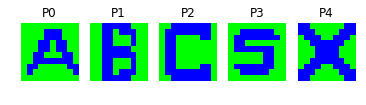

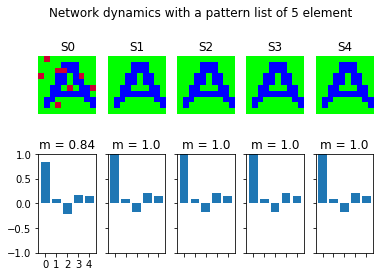

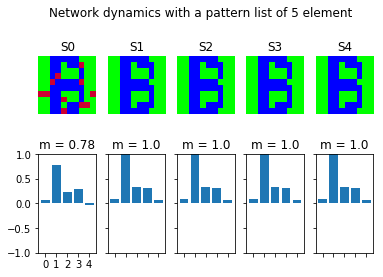

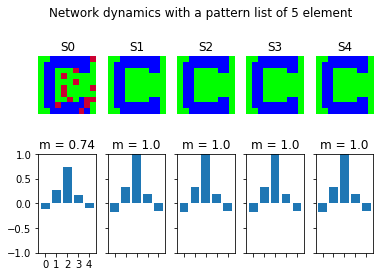

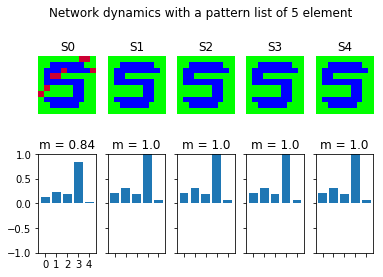

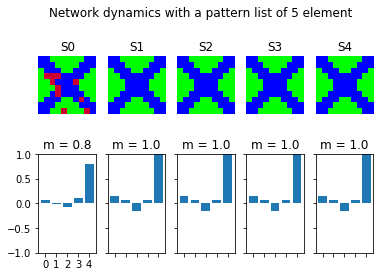

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


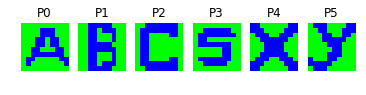

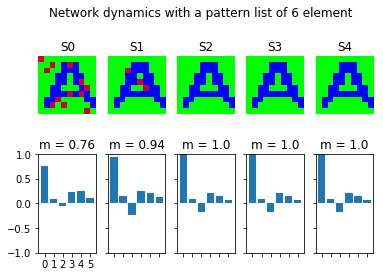

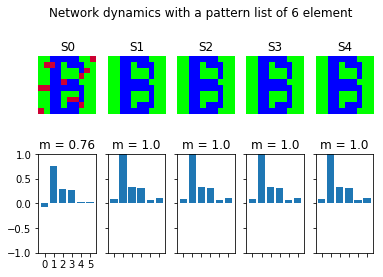

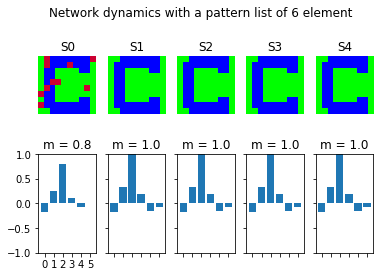

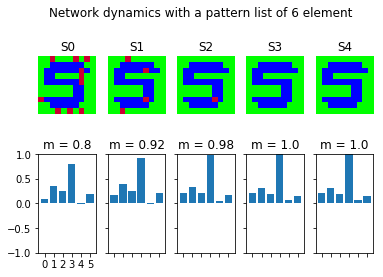

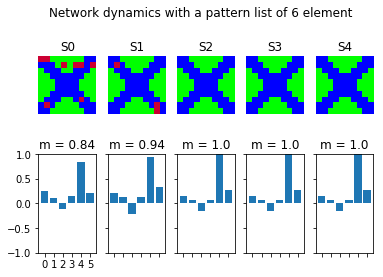

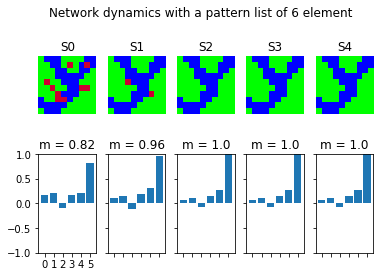

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


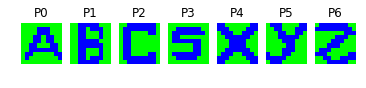

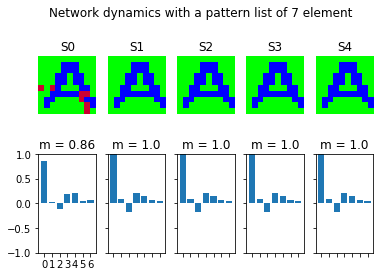

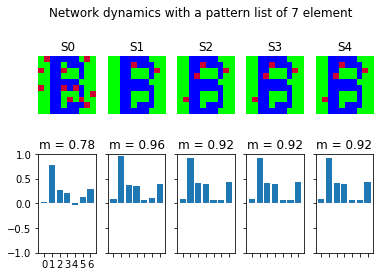

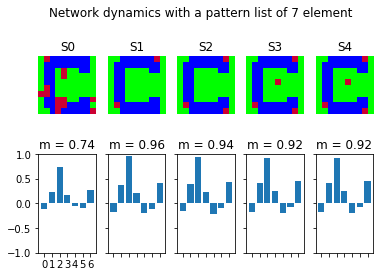

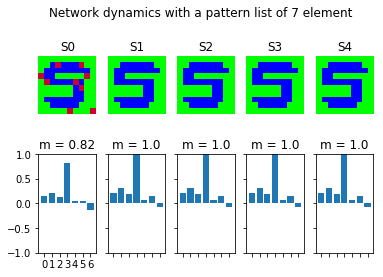

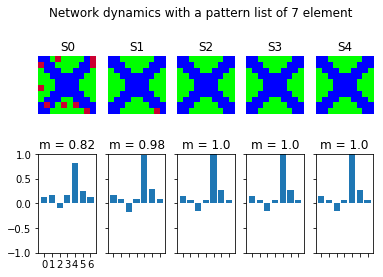

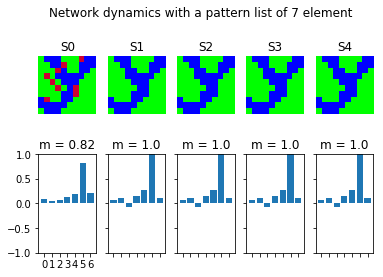

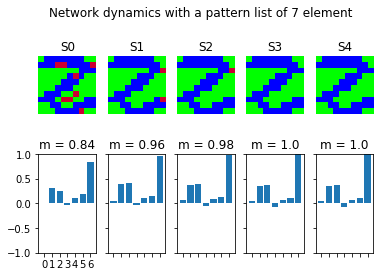

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


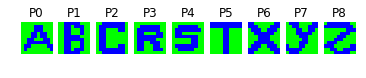

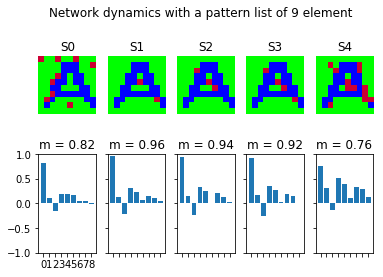

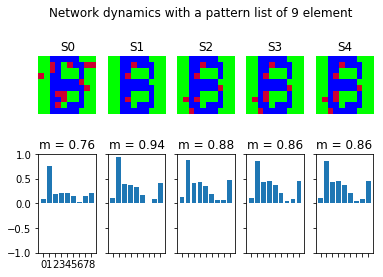

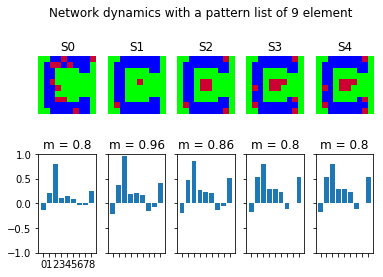

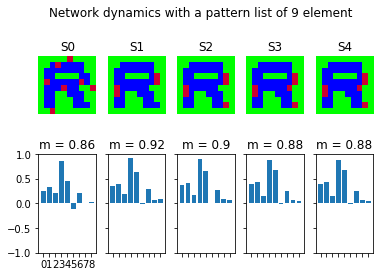

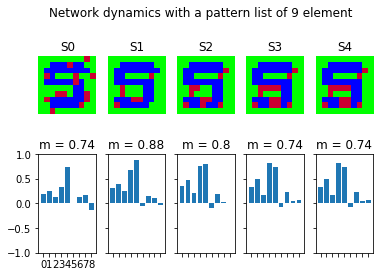

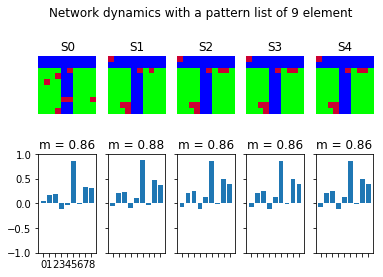

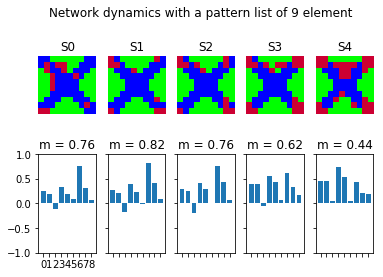

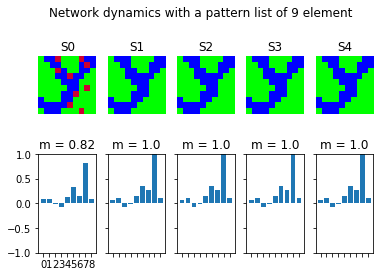

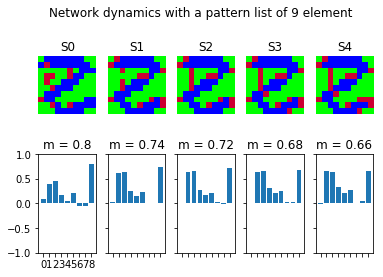

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


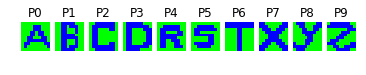

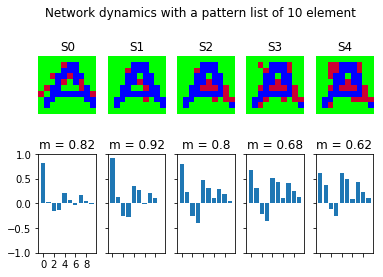

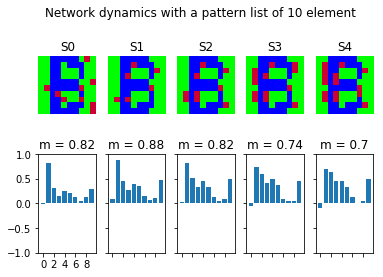

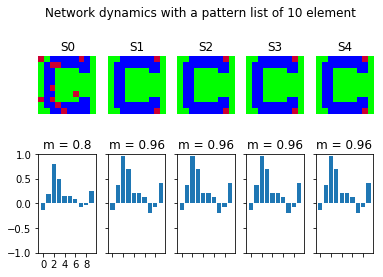

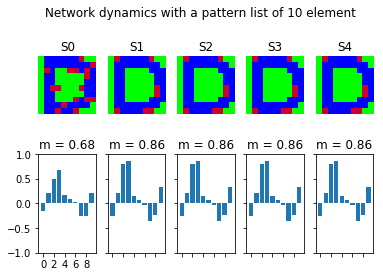

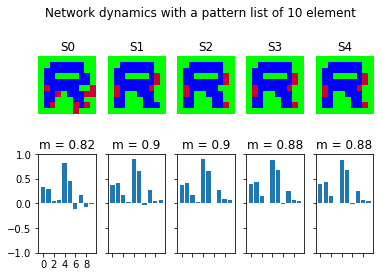

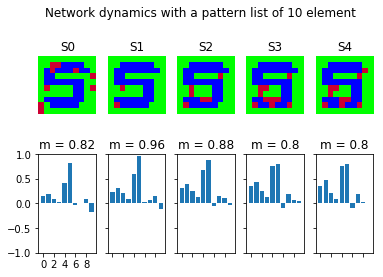

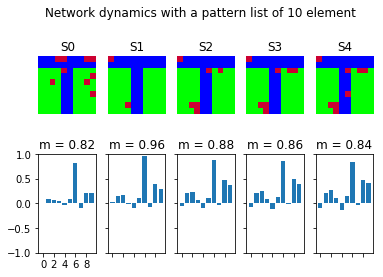

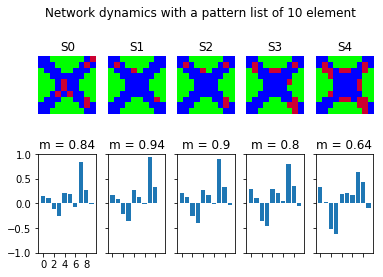

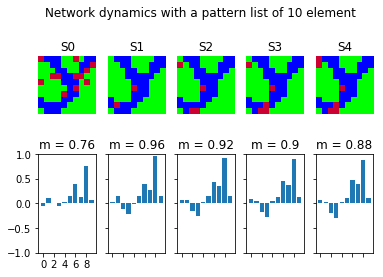

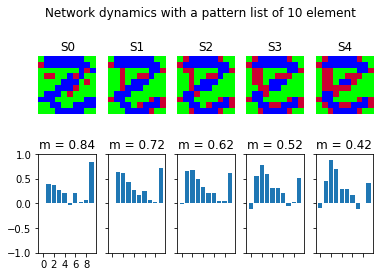

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


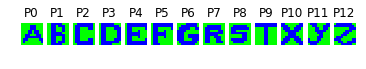

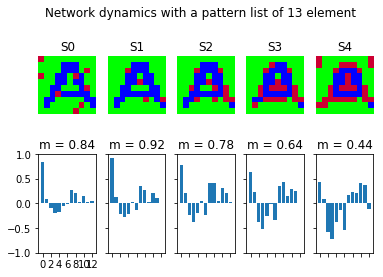

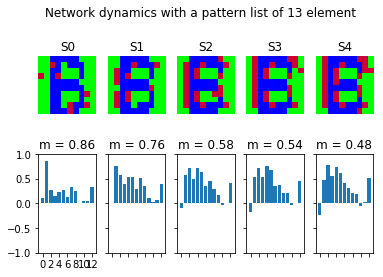

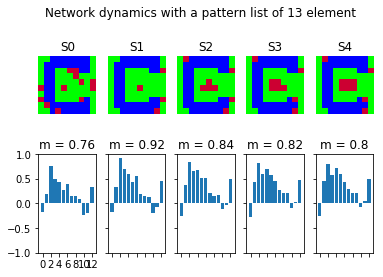

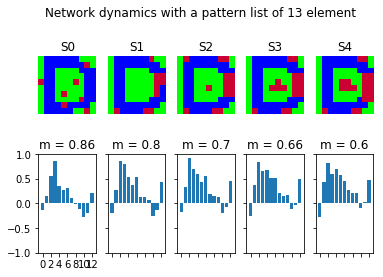

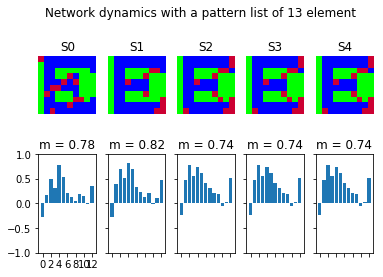

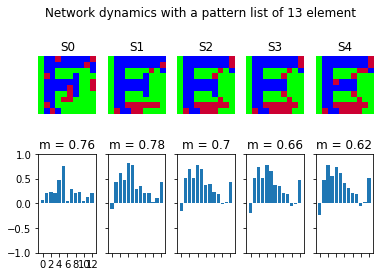

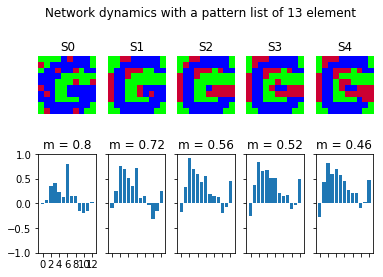

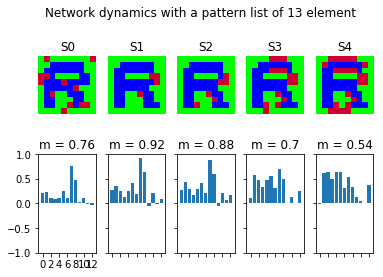

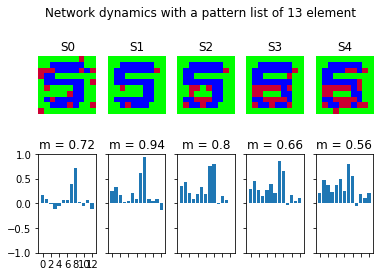

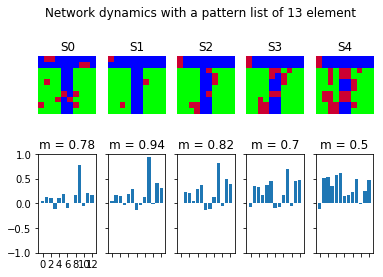

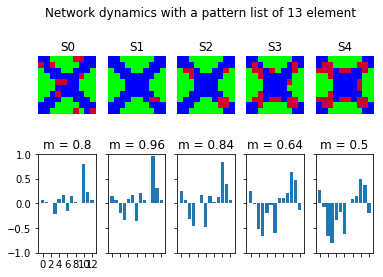

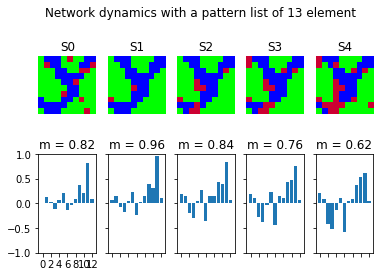

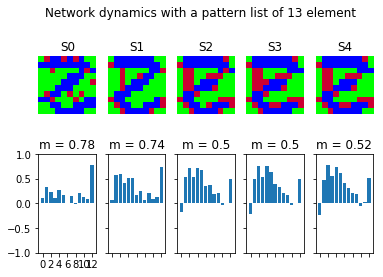

In [12]:
# the letters we want to store in the hopfield network
letter_list_retrieve_5= ['A', 'B', 'C', 'S', 'X']
letter_list_retrieve_6= ['A', 'B', 'C', 'S', 'X', 'Y']
letter_list_retrieve_7= ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']
letter_list_retrieve_9= ['A', 'B', 'C','R', 'S', 'T','X', 'Y', 'Z']
letter_list_limit_10= ['A', 'B', 'C','D','R', 'S','T', 'X', 'Y', 'Z']
letter_list_fail_13= ['A', 'B', 'C','D','E','F','G','R', 'S','T', 'X', 'Y', 'Z']
list_=[letter_list_retrieve_5,letter_list_retrieve_6,letter_list_retrieve_7,letter_list_retrieve_9,letter_list_limit_10,letter_list_fail_13]

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

for i in range (len(list_)):
    abc_dictionary =pattern_tools.load_alphabet()
    print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
    # access the first element and get it's size (they are all of same size)
    pattern_shape = abc_dictionary['A'].shape
    print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
    # create an instance of the class HopfieldNetwork
    hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

    # create a list using Pythons List Comprehension syntax:
    pattern_list = [abc_dictionary[key] for key in list_[i]]
    plot_tools.plot_pattern_list(pattern_list)

    # store the patterns
    hopfield_net.store_patterns(pattern_list)
    
    for j in range (len(list_[i])):
        # # create a noisy version of a pattern and use that to initialize the network
        noisy_init_state = pattern_tools.get_noisy_copy(pattern_list[j], noise_level=0.2)
        hopfield_net.set_state_from_pattern(noisy_init_state)

        # from this initial state, let the network dynamics evolve.
        states = hopfield_net.run_with_monitoring(nr_steps=4)

        # each network state is a vector. reshape it to the same shape used to create the patterns.
        states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)
        # plot the states of the network
        plot_tools.plot_state_sequence_and_overlap(
            states_as_patterns, pattern_list, reference_idx=j, suptitle="Network dynamics with a pattern list of {0} element".format(len(list_[i])))

#### [3 points]
# PK ON A CETTE DISCREPANCY !!!

#### Explain the discrepancy between the network capacity C (computed above) and your observation. (max 4 lines)
We have seen previously that : $C_{store}$ = $M_{max}$/(N^2)
If we accept an error probability of Perror=0.001, we find a storage capacity of Cstore=0.105.
In our case, $M_{max}$ = K = $C_{store}$*N^2 = $C_{store}$ *100=0.105*100=10.5 patterns.
The maximal number $M_{max}$ of patterns that a network can store/retrieve is 10 patterns.

Thanks to our simulation, we guess that the number of maximal number of pattern the network can retrieve is 6.
In fact for 5 and 6 patterns, the network can retrieve each pattern.
On the contrary, for 7 patterns and more, the network can't retrieve each pattern. For 7 patterns retrieval of 4 patterns, for 9 patterns retrieval of 1 pattern, for 10 patterns retrieval of 0 patterns, for 13 patterns retrieval of 0 patterns.

Thus we observe a discrepancy between this theorical number we calculate (10) and the number of maximal number of pattern the network can retireve (6). 



# 8.6. Implementing different types of dynamics
### *** Note:*** this exercise is NOT a bonus and it is graded
## 8.6.1. Exercise:
Implement a Hopfield network with asynchronous dynamics (use the function set_dynamics_sign_async()). Store 5 random patterns (take inspiration from exercise 8.3). Fix a noisy initial state, run the network a few times and observe the performance over the different trials.

Parameters: network size=5x5, number of rnd patterns=5, on probability=0.5, number of flips=8.
#### [5 points]

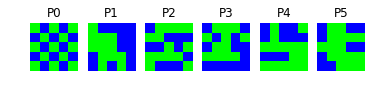

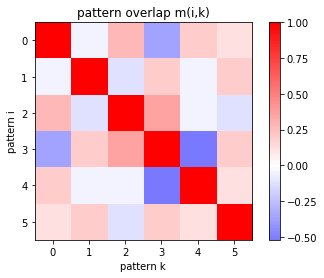

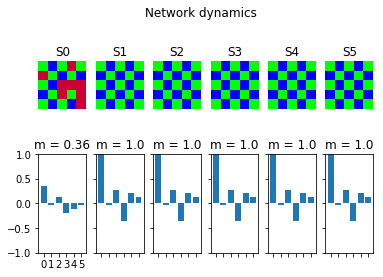

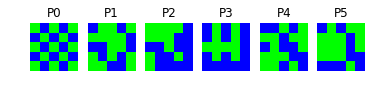

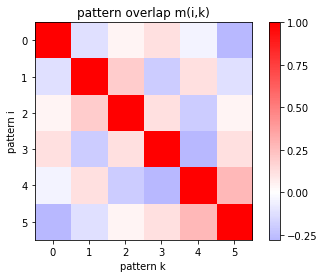

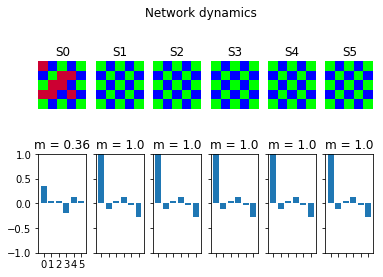

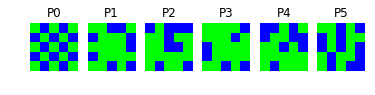

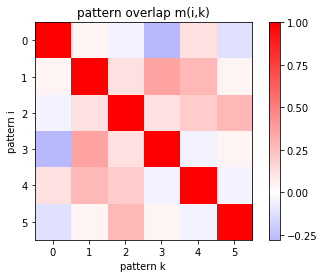

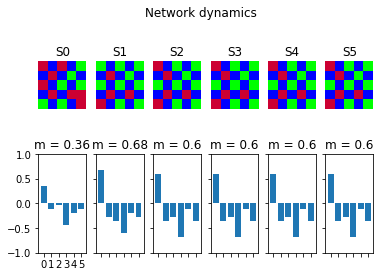

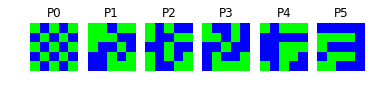

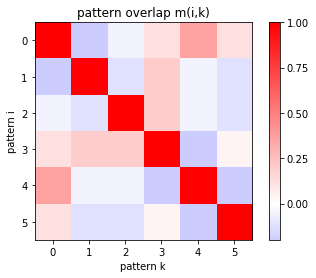

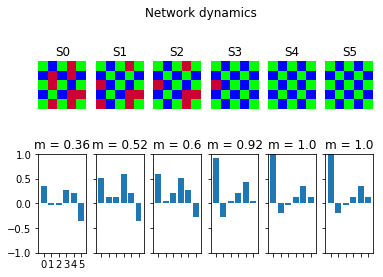

In [13]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import matplotlib.pyplot as plt

pattern_size = 5

for i in range (4):
    # create an instance of the class HopfieldNetwork
    hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
    #  enable an ASYNCHRONOUS network dynamic
    # Sets the update dynamics to the g(h) = sign(h) functions. Neurons are updated asynchronously: In random order, all neurons are updated sequentially
    hopfield_net.set_dynamics_sign_async()
    # instantiate a pattern factory
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
    # create a checkerboard pattern and add it to the pattern list
    checkerboard = factory.create_checkerboard()
    pattern_list = [checkerboard]

    # add random patterns to the list
    pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
    plot_tools.plot_pattern_list(pattern_list)
    # how similar are the random patterns and the checkerboard? Check the overlaps
    overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
    plot_tools.plot_overlap_matrix(overlap_matrix)

    # let the hopfield network "learn" the patterns. Note: they are not stored
    # explicitly but only network weights are updated !
    hopfield_net.store_patterns(pattern_list)

    # create a noisy version of a pattern and use that to initialize the network
    noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
    hopfield_net.set_state_from_pattern(noisy_init_state)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=5)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
    


Comment on your results (max 3 lines).
#### [3 points]

Updates in the Hopfield network can be performed in two different ways:

Asynchronous: Only one unit is updated at a time. This unit can be picked at random, or a pre-defined order can be imposed from the very beginning.

Synchronous: All units are updated at the same time. This requires a central clock to the system in order to maintain synchronization. This method is viewed by some as less realistic based on an absence of observed global clock influencing analogous biological or physical systems of interest.

From the results, we can see that the network is not able to match perfectly the pattern one time. However, at the end the network is able to come quite close to the ideal solution. In fact, idexing of neuron is different from before about the update of the function. Thus, the model can converge to the checkerboard pattern and sometimes not, due to the possible existence of local minima.

## 8.6.2. Stochastic neuron
Implement a synchronous and stochastic neuron. Use the function HopfieldNetwork.set_dynamics_to_user_function() in order to pass _get_sigmoid_update_function(), which you should implement. 

In the stochastic network the dynamics depend on the so-called inverse temperature $\beta$. The temperature in this system can be seen as noise. The activity $S_i(t+1)$ in the next time-step follows the probability distribution: 
\begin{equation}
P\left(S_i(t+1)=1\right) = \frac1{1+\exp\left[-h_i(t)\beta\right]} \qquad \textrm{ where } \qquad h_i(t) = \sum_j w_{ij} S_j(t)
\end{equation}
That is, it is more likely for a neuron $i$ to be set to +1 if its input $h_i$ is higher.

Parameters: network size = 5x5, number of rnd patterns = 5, on probability = 0.5, number of flips = 8, $\beta$=10.

*** Hint 1: *** For inspiration check out the source code of the function _get_sign_update_function()

*** Hint 2: *** In order to implement stochasticity, we suggest to use the python-library numpy.random.

#### [7 points]

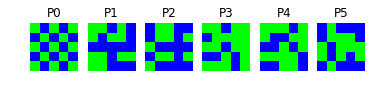

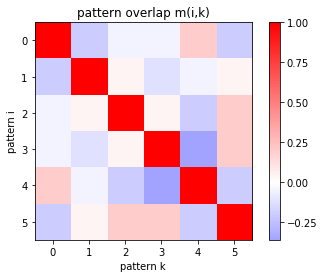

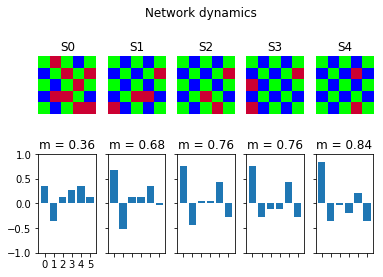

In [14]:
import numpy as np
###############manque le coté stochastic avec np.ranom##################333
# Synchronous stochastic update
def _get_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a synchronous state update using the sigmoid function (h)
    """
    def upd(state_s0, weights):
        h = np.sum(weights * state_s0, axis=1)
        ####notre version qui donne un sale output ####
        #s1 = 1/(1+np.exp(-h*beta+np.random.randn(1)))
        # by definition, neurons have state +/-1. If the
        # sign function returns 0, we set it to +1
        #idx0 = s1 == 0
        #s1[idx0] = 1
        seuil = 1/(1+np.exp(-h*beta))
        s1 = np.ones(seuil.shape)
        rand = np.random.uniform(0,1, seuil.shape)
        idx = seuil <= rand
        s1[idx] = -1
        return s1
    return upd


beta = 10
pattern_size=5
hopfield_net_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_stoch.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=beta))
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)
hopfield_net_stoch.store_patterns(pattern_list)
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net_stoch.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_stoch.run_with_monitoring(nr_steps=4)
# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics") 

## 8.6.3 Finite temperature
Choose one of the stored patterns (let's say number 1) and flip 10 bits. Then plot the overlap between the network state and this pattern, $m^1$, over time for different values of $\beta$, $\beta\in \left[0.1,2,5,100\right]$.

Parameters: network size = 10x10, number of rnd patterns = 5, on probability = 0.5, number of flips = 10, number of trials = 100, number of steps = 9.

*** Hint 1:***  In order to plot $m^1$ over time, run the script several times and compute the mean  and the standard deviation $\sigma$ of the overlap $m^1$ over trials. You can use the function plt.fill and its parameter $\alpha$ (the transparency), in order to fill with color the area between $+\sigma$ and $-\sigma$.

*** Hint 2: *** Use the function pattern_tools.compute_overlap()

*** Hint 3:*** We suggest to implement and test your code with a smaller network size before getting to the 10x10 units network.
#### [7 points]

# Difference avec dave c'est qu il a changer le nom du model qu'il train au milieu de son code du coup je pense que je suis bon !! KEN KEN KEN

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


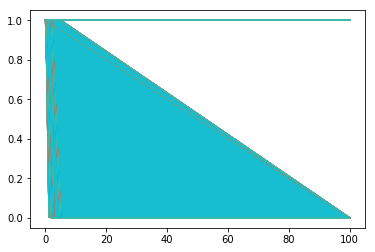

In [15]:
def compute_overlap_over_time(hopfield_net, pattern_list, idx, init_state, nTrials, nr_steps):
    """ For a given hopfield_net and a pattern_list, initialize it with the init_state and run it
    Compute its overlap with the pattern pattern_list[idx] in time (for nr_steps)
    Repeat the above over many trial (nTrials)
    """
    overlap = np.zeros((nTrials,nr_steps+1))
    
    for i in range(0,nTrials):
        
        # learn patterns
        hopfield_net.store_patterns(pattern_list)
        
        # run a synch and stoch Hopfield model with the same initial state
        hopfield_net.set_state_from_pattern(init_state)
        states = hopfield_net.run_with_monitoring(nr_steps=nr_steps)
        
        #######################J'ai mis deux model et je pense utiliser ceui sych et stoch ... mais je comprend pas bien leur consigne #########
        
        # let the netwrok dynamics evolve
        states_as_patterns = factory.reshape_patterns(states)
        
        for i_step in range(len(states_as_patterns)):
            overlap[i,i_step] = pattern_tools.compute_overlap(pattern_list[idx],states_as_patterns[i_step]) ### ??? 
    return overlap


# Create the patterns and store them
nTrials = 100
nr_steps= 9
betas = [0.1,2,5,100]
idx=1
pattern_size=10

overlap_mean = np.zeros((len(betas), nr_steps+1))
overlap_std = np.zeros((len(betas), nr_steps+1))
for j in range(0, len(betas)):
    
    #???
    #DECLARE A NEW HOPFIELD NET FOR EACH BEAT 
    hopfield_net_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
    hopfield_net_stoch.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=betas[j]))
    
    #CREATE A PATTERN LIST
    checkerboard = factory.create_checkerboard()
    pattern_list = [checkerboard]
    pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
    pattern_list[idx] = pattern_tools.flip_n(pattern_list[idx], nr_of_flips=10)
    #CREATE INITIAL STATE
    init_state =(pattern_list[idx])
    ############problàe avec idx je l'utilise jamais dans la fonction et je ne sais pas ce que c'est########3
    
    #Overlap is a 2D vector were in the 1st column is the trial number and on the second one the number of trial
    overlap = compute_overlap_over_time(hopfield_net, pattern_list, idx, init_state, nTrials, nr_steps)
    
    overlap_mean[j,:] = np.mean(overlap[:,nr_steps]) ### pour un beta et chqaue pattern
    overlap_std[j,:] = np.std(overlap[:,nr_steps])
    
    print (overlap_mean)
    # Plot
    plot = plt.plot(betas, overlap_mean-overlap_std)
    plt.fill(betas, overlap_mean-overlap_std, overlap_mean+overlap_std)
    

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


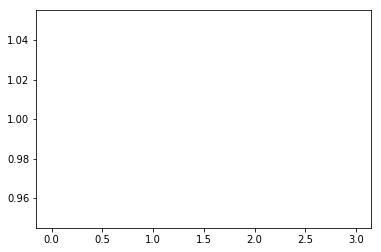

In [16]:
print(overlap_mean)
plt.fill(overlap_mean)


Comment on your plot (max 5 lines).
#### [5 points]

write your answer here

## 8.6.4 Asynchronous stochastic neuron
Implement the stochastic neuron of exercise 8.6.2, but with asynchronous update.

*** Hint: *** For help check out the source code of the function _get_async_sign_update_function()
#### [4 points]

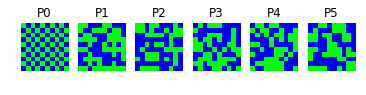

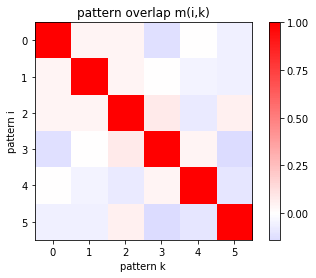

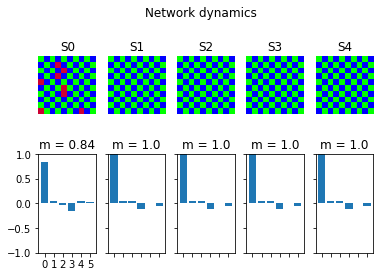

In [17]:
def _get_asynch_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a asynchronous state update using the sigmoid function
    """
    def upd(state_s0, weights):
        random_neuron_idx_list = np.random.permutation(len(state_s0))
        state_s1 = state_s0.copy()
        
        for i in range(len(random_neuron_idx_list)):
            rand_neuron_i = random_neuron_idx_list[i]
            h_i = np.dot(weights[:, rand_neuron_i], state_s1)
            p_i = 1/(1+np.exp(-h_i*beta)) 
            if(p_i < np.random.uniform(0,1)):
                state_s1[rand_neuron_i] = -1
            else:
                state_s1[rand_neuron_i] = 1  
            
        return state_s1
    return upd

beta = 10
hopfield_net_asynch_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_asynch_stoch.set_dynamics_to_user_function(_get_asynch_sigmoid_update_function(beta=beta))

factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)
hopfield_net_stoch.store_patterns(pattern_list)
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net_stoch.set_state_from_pattern(noisy_init_state)
states = hopfield_net_stoch.run_with_monitoring(nr_steps=4)
states_as_patterns = factory.reshape_patterns(states)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics") 

# 8.7 Energy 

## 8.7.1 Exercise
Set up a deterministic and asynchronous Hopfield network and store 3 random patterns. 

The energy can be defined as $E=-\sum_i^N \sum_j^N w_{ij} S_i S_j$. 

Implement a function that calculates the energy according to the above definition. 

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5.

# ca veut dire quoi deterministic ds consigne

# je sais pas par rapport à consigne si on doit ajouter checkerboard ou pas
# antoine et eve on juste 3 rand pattern sans cheker board

#### [4 points]

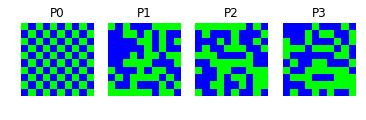

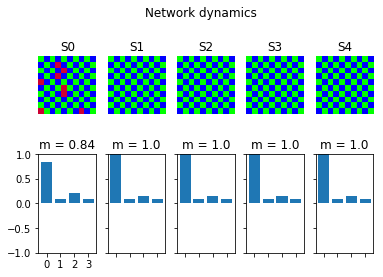

(7L, 100L)
(100L, 100L)
[ 1.02 -0.82  1.02 -0.82  0.54 -0.82  1.02 -0.54  0.86 -0.62 -0.86  0.7
 -0.54  0.82 -0.86  0.86 -1.02  0.98 -0.94  0.62  0.5  -0.86  0.66 -0.98
  0.98 -0.5   0.66 -0.7   0.7  -0.7  -1.1   0.54 -1.02  0.66 -0.98  0.86
 -0.98  0.98 -1.02  0.7   0.62 -0.82  0.7  -0.54  0.66 -0.54  0.98 -0.98
  0.82 -0.62 -0.86  0.5  -0.5   1.02 -0.66  0.86 -0.82  0.7  -0.94  0.82
  0.86 -0.86  0.66 -0.98  0.86 -1.02  0.82 -0.66  0.62 -0.82 -0.86  0.82
 -1.02  0.86 -0.54  1.02 -0.5   0.58 -0.66  0.54  0.98 -0.86  0.7  -0.66
  0.5  -1.02  0.54 -0.7   0.54 -0.66 -0.58  0.82 -0.54  1.02 -0.7   1.02
 -1.02  0.98 -0.5   0.5 ]

Energy of state 0 is : -63.24

Energy of state 1 is : -99.24

Energy of state 2 is : -99.24

Energy of state 3 is : -99.24

Energy of state 4 is : -99.24

Energy of state 5 is : -99.24

Energy of state 6 is : -99.24


In [18]:
import numpy as np

def energy(weight, state): # Implement a function that calculates the energy according to the above definition.
    energy = -np.sum(np.dot(weight,np.transpose(state))*state)
    return energy


# Set up your network
pattern_size = 10 
hopfield_net_asynch_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_asynch_stoch.set_dynamics_sign_async()
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5)) # Set up a deterministic and asynchronous Hopfield network and store 3 random patterns
plot_tools.plot_pattern_list(pattern_list)
hopfield_net_asynch_stoch.store_patterns(pattern_list)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=10)
hopfield_net_asynch_stoch.set_state_from_pattern(noisy_init_state)
states = hopfield_net_asynch_stoch.run_with_monitoring(nr_steps=6)
states_as_patterns = factory.reshape_patterns(states)

print(np.shape(states))
print(np.shape(hopfield_net_asynch_stoch.weights))
print(np.dot(hopfield_net_asynch_stoch.weights,np.transpose(states[0])))
#weight is a nrOfNeurons x nrOfNeurons matrix of weights = hopfield_network.weights
#State is a 5 x 100 matrix : 5 is the number of steps and 10 x 10 is 100
#--> as input we have the sum of a 100 x 100 matrix with a 1 x 100 vector and we sum 

E = []
for i in range(7):
    E.append(energy(hopfield_net_asynch_stoch.weights,states[i]))
    print ('\nEnergy of state {0} is : {1}'.format(i,E[i]))

## 8.7.2 Exercise
Compute the energy of one of the stored patterns: $E (\xi^{\mu})$.

Choose one pattern and gradually flip more and more bits. For that you need to implement a function flip_idx, after checking out the function pattern_tools.flip_n(). How does the energy change and why? (max 3 lines)

*** Hint: *** You can get an intuition by plotting the energy of the state as a function of the number of flipped bits.
#### [1 + 6 + 4 points]

# pas sur de de laisser le graph jusqu'a 90 flip ... pas demander mais je trouve ca interessant ...

The energy of the fourth and thus the last stored pattern is : -0.76


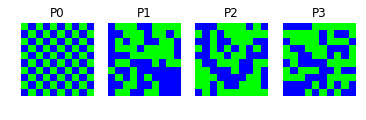

<function matplotlib.pyplot.show>

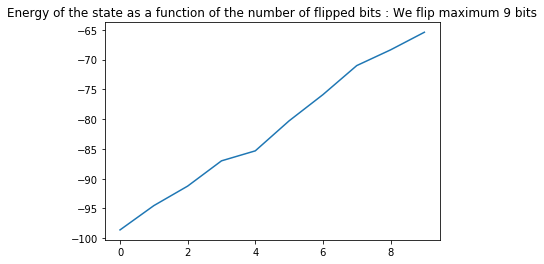

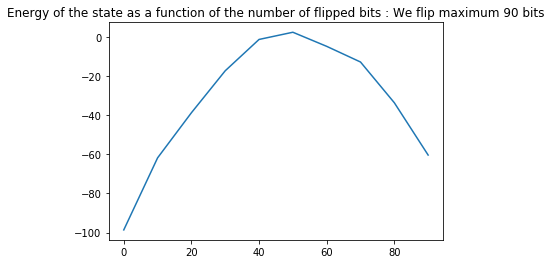

In [39]:
# Compute the energy of one of the stored patterns:  E(ξμ)
E_third_pattern = energy(hopfield_net_asynch_stoch.weights,(pattern_list[3].flatten()))
print("The energy of the fourth and thus the last stored pattern is : {}".format(E_third_pattern))

def flip_idx(template, nr_of_flips):
 
    n = np.prod(template.shape)
    # pick nrOfMutations indices (without replacement)
    idex_to_be_flip = np.random.choice(n, nr_of_flips, replace=False)
    linearization =template.flatten()
    linearization[idex_to_be_flip] = -linearization[idex_to_be_flip]
    linearization = linearization.reshape(template.shape)
    return linearization

# Set up your network
pattern_size = 10
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net.set_dynamics_sign_async()
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
hopfield_net.store_patterns(pattern_list)
    
nr_flips = np.arange(0,10,1)
energy_flips_10 = np.zeros(len(nr_flips))
energy_flips_100= np.zeros(len(nr_flips))

pattern_to_flip = pattern_list[-1] #so that we always start flipping from the same prototype

for i in range(len(nr_flips)):

    pattern_choose_10 = flip_idx(pattern_list[0], nr_flips[i])
    hopfield_net.set_state_from_pattern(pattern_choose_10)
    states_10 = hopfield_net.run_with_monitoring(nr_steps=6)
    energy_flips_10[i] = energy(hopfield_net.weights,states_10[0])
    
    pattern_choose_100 = flip_idx(pattern_list[0], nr_flips[i]*10)
    hopfield_net.set_state_from_pattern(pattern_choose_100)
    states_100 = hopfield_net.run_with_monitoring(nr_steps=6)
    energy_flips_100[i] = energy(hopfield_net.weights,states_100[0])
    
#Plot
plt.figure()
plt.plot(nr_flips, energy_flips_10)    
plt.title('Energy of the state as a function of the number of flipped bits : We flip maximum 9 bits')
plt.show

plt.figure()
plt.plot(nr_flips*10, energy_flips_100)
plt.title('Energy of the state as a function of the number of flipped bits : We flip maximum 90 bits')
plt.show


### How does the energy change and why? (max 3 lines)

As we show in the course, energy have local minima when the model is assume to have symmetric interaction and when we assume a deterministic asynchronous update. You can see the theorical curve just below. Indeed, the energy is a function that the network try to minimize compare to the pattern we choose.

In fact, we saw in the first graph (max 9 bits flipped) that when we increase the number of flip bits, the energy increase linearly. We can see that when 0 bit are fliped, we have a local minima (-100). Then we can say that This function has local minima at stored patterns. Then the more we flip bits, the more the energy increase and thus the more we are away from our minima.

Moreover we found in the second graph (max 90 bits flipped) a shape that look like to the theorical figure. Energy inscrease as we go away from the local minima and then around 50 bits fliped, we reach a local maxima. Then we get closer to a new local minima as the number of bits fliped increase. 


![Max_rate](energy.PNG)

## 8.7.3 Question.
Compute the energy of the reverse of one of the stored patterns $E(-\xi^1)$. What do you observe, what are the consequences on the dynamics of the system and why? (max 3 lines) 
#### [1 + 3 points]

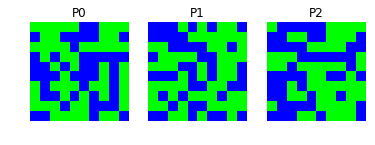

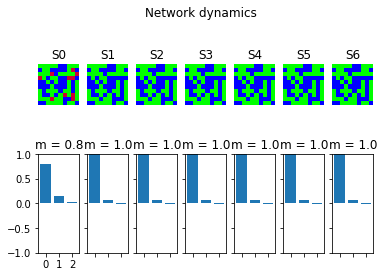

('Energy of initial state is :', -62.999999999999993)
('Reverse energy of initial state is :', -62.999999999999993)


In [44]:
def energy_reverse(weight, state): # Implement a function that calculates the energy according to the above definition.
    state = -state
    energy = -np.sum(np.dot(weight,np.transpose(state))*state)
    return energy

# Set up your network
pattern_size = 10
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net.set_dynamics_sign_async()
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
pattern_list = []
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
hopfield_net.store_patterns(pattern_list)
noisy_init_state= pattern_tools.flip_n(pattern_list[0], nr_of_flips=10)
hopfield_net.set_state_from_pattern(noisy_init_state)
states = hopfield_net.run_with_monitoring(nr_steps=6)
states_as_patterns = factory.reshape_patterns(states)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

E=[]
E.append(energy(hopfield_net.weights,states[0]))
E.append(energy_reverse(hopfield_net.weights,states[0]))

print('Energy of initial state is :', E[0])
print('Reverse energy of initial state is :', E[1])

#### What do you observe, what are the consequences on the dynamics of the system and why? (max 3 lines)

We found the same results. In fact, as there are twice a time the pixel value of the pattern in the formula (the pixel values of one state are just the opposite of the othe), the two minus sign cancel and thus we found the same result. See below the adapted formula : 
$E = -\sum_i^N \sum_j^N w_{ij} S_i S_j -\sum_i^N \sum_j^N w_{ij} (-S_i) (-S_j) $.

## 8.7.4 Exercise.
1 - Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$ and run the dynamics. What is the energy of this state?

Parameters: number steps = 4.

#### [2 points]

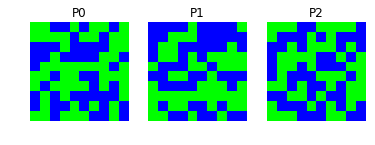

Sum of the 3 pattern : 


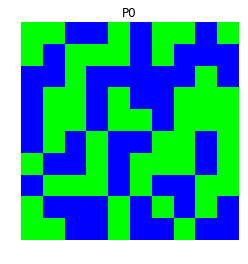

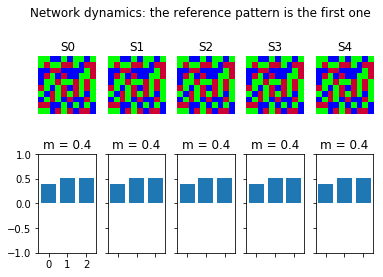

Energy of a deterministic and asynchronous Hopfield network and store 3 random patterns initialize with is S0 :
Energy of the sum state is : 
-67.08


In [68]:
pattern_size = 10 
hopfield_net= network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net.set_dynamics_sign_async()
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
pattern_list = []
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
hopfield_net.store_patterns(pattern_list)

#  Initialize the network with the state  S0
sum_ = np.sign((sum(pattern_list)))
print('Sum of the 3 pattern : ')
plot_tools.plot_pattern_list([sum_])

hopfield_net.set_state_from_pattern(sum_)
states = hopfield_net.run_with_monitoring(nr_steps=4)
states_as_patterns = factory.reshape_patterns(states)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics: the reference pattern is the first one")

E=energy(hopfield_net.weights, states[0])

print ('Energy of a deterministic and asynchronous Hopfield network and store 3 random patterns initialize with is S0 :')
print('Energy of the sum state is : ')
print (E)




2 - Consider the ensemble of all states that differ from $S_0$ in exactly one flip. Initialize the network in each of those states and check what is the final state of the dynamical evolution.

*** Hint: *** Compare the final states with $S_0$.
#### [8 points]

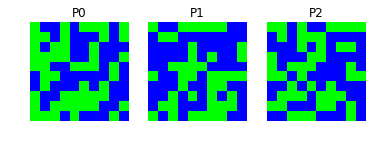

Sum of the 3 pattern : 


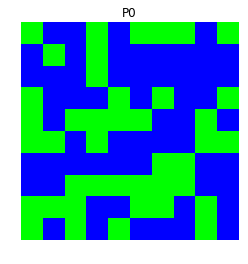

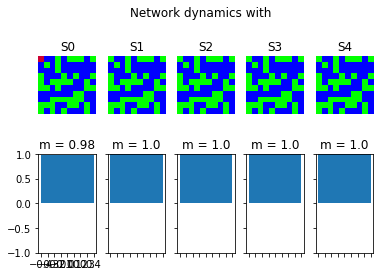

After having flip the 0 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


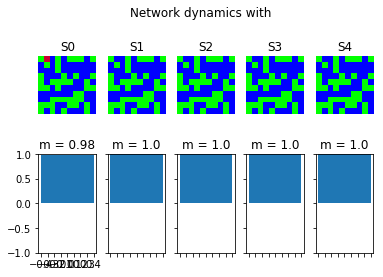

After having flip the 1 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


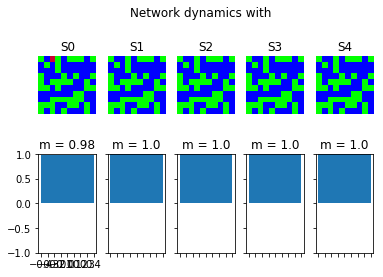

After having flip the 2 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


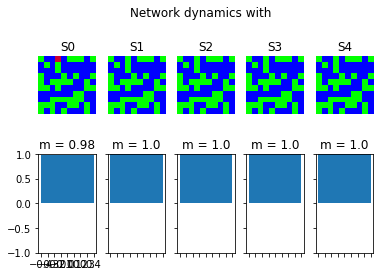

After having flip the 3 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


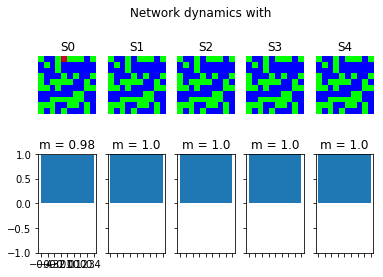

After having flip the 4 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


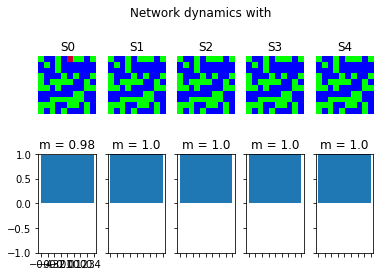

After having flip the 5 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


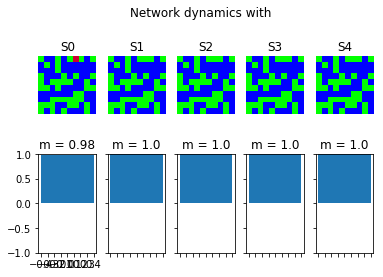

After having flip the 6 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


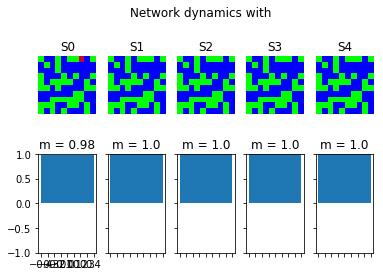

After having flip the 7 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


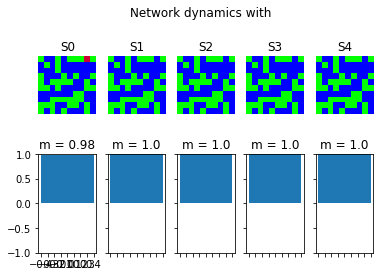

After having flip the 8 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


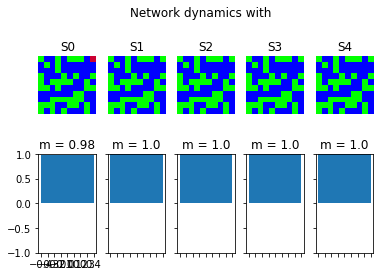

After having flip the 9 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


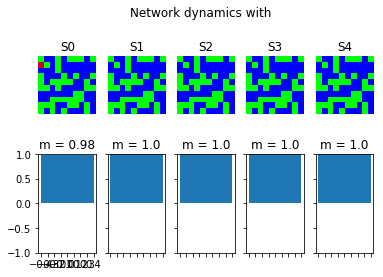

After having flip the 10 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


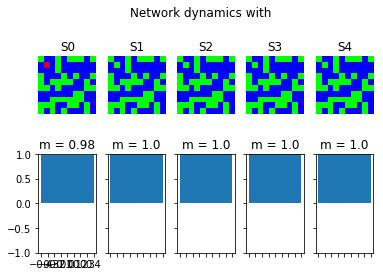

After having flip the 11 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


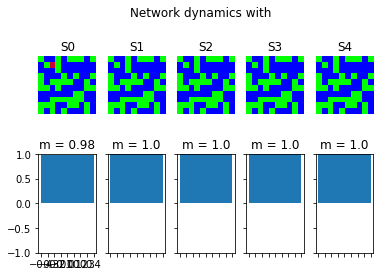

After having flip the 12 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


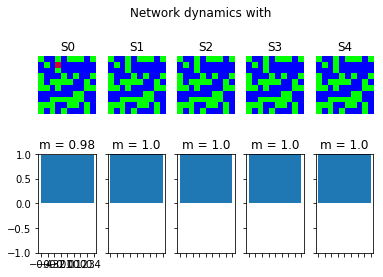

After having flip the 13 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


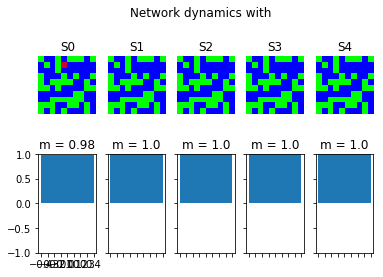

After having flip the 14 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


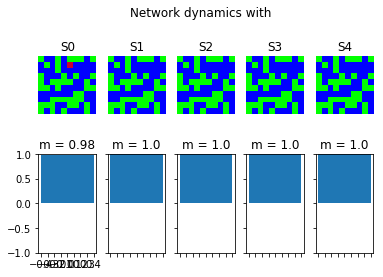

After having flip the 15 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


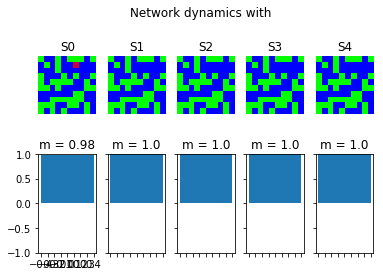

After having flip the 16 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


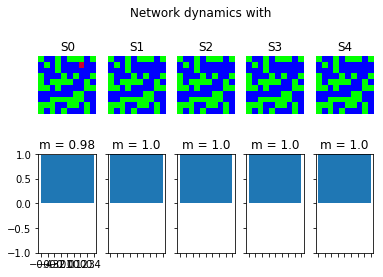

After having flip the 17 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


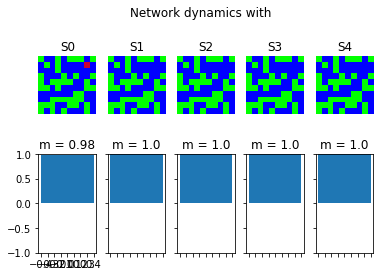

After having flip the 18 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


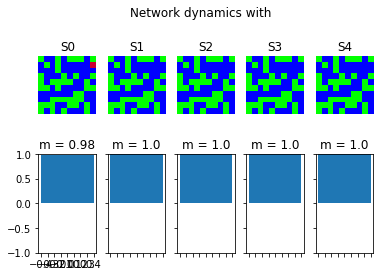

After having flip the 19 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


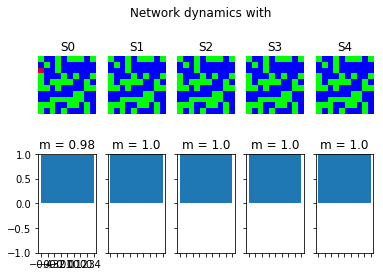

After having flip the 20 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


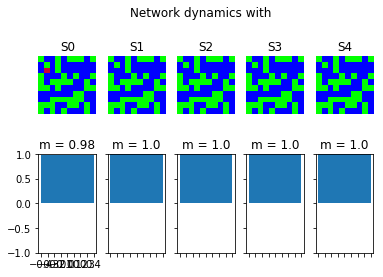

After having flip the 21 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


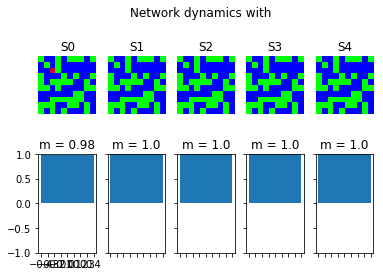

After having flip the 22 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


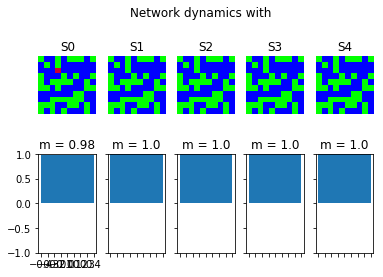

After having flip the 23 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


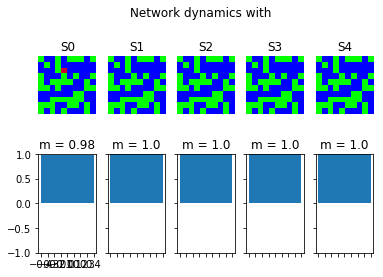

After having flip the 24 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


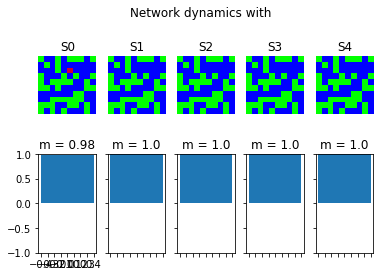

After having flip the 25 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


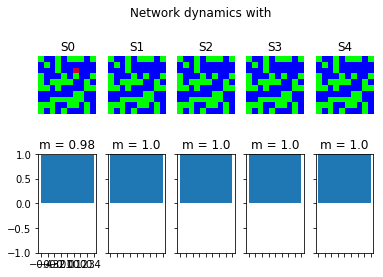

After having flip the 26 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


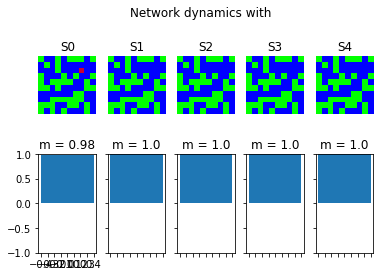

After having flip the 27 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


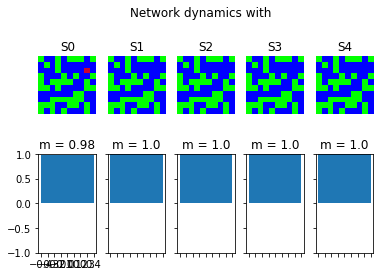

After having flip the 28 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


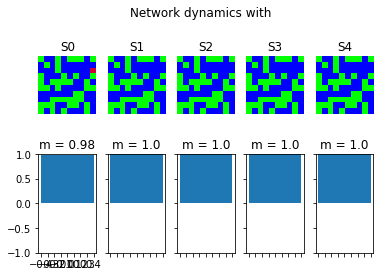

After having flip the 29 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


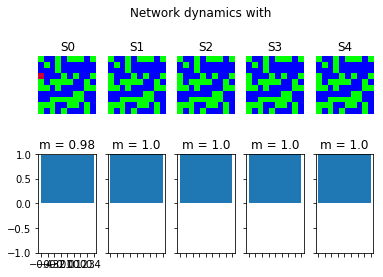

After having flip the 30 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


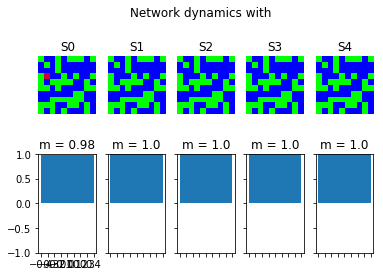

After having flip the 31 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


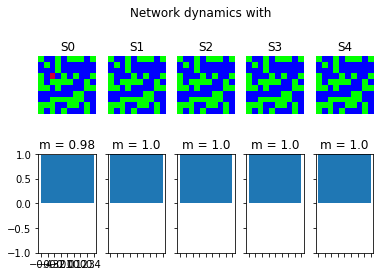

After having flip the 32 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


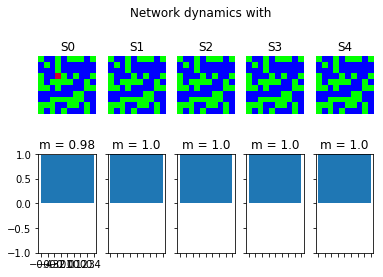

After having flip the 33 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


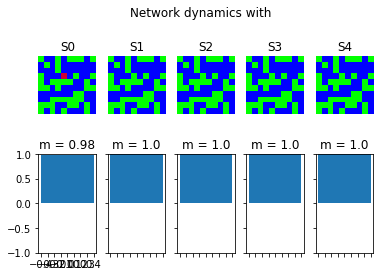

After having flip the 34 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


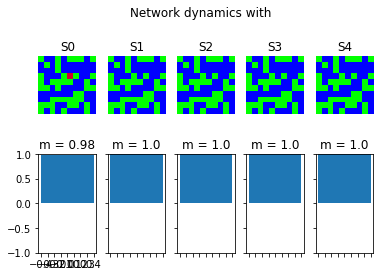

After having flip the 35 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


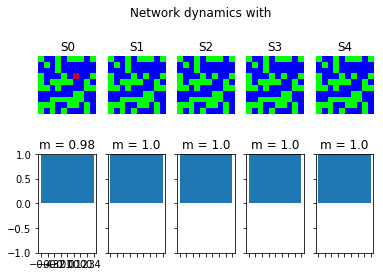

After having flip the 36 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


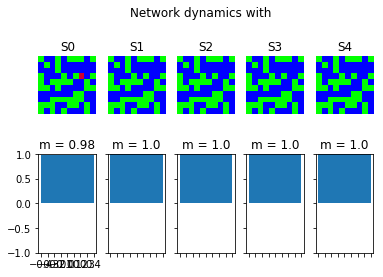

After having flip the 37 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


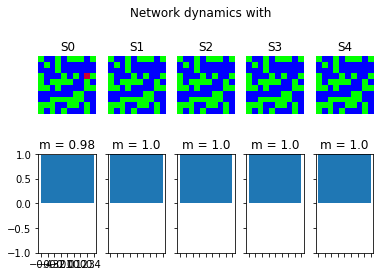

After having flip the 38 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


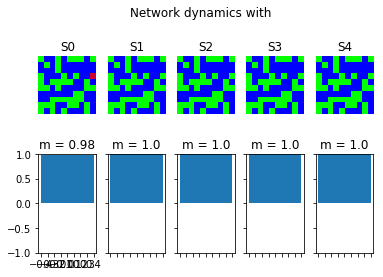

After having flip the 39 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


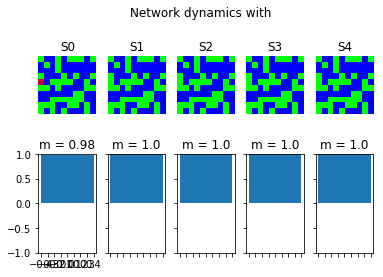

After having flip the 40 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


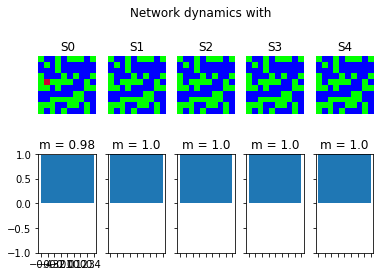

After having flip the 41 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


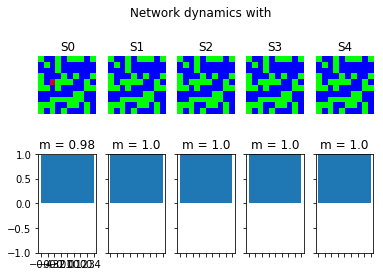

After having flip the 42 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


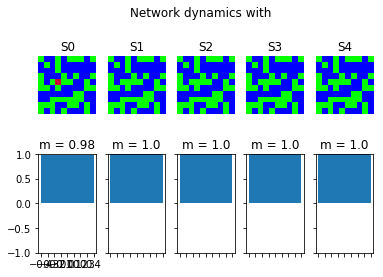

After having flip the 43 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


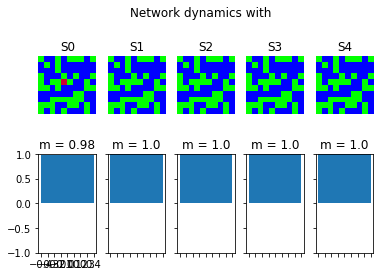

After having flip the 44 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


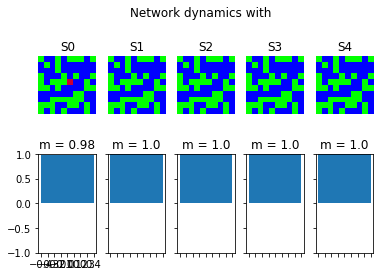

After having flip the 45 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


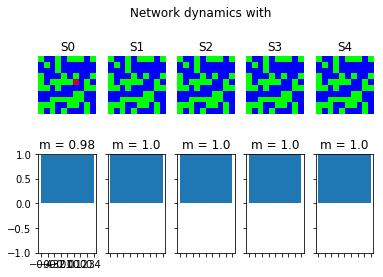

After having flip the 46 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


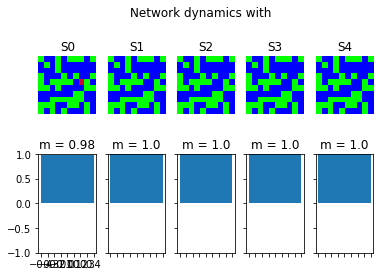

After having flip the 47 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


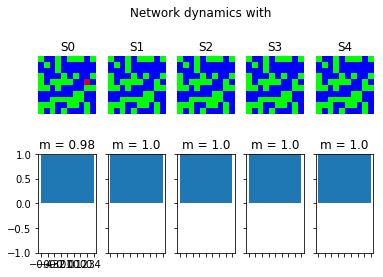

After having flip the 48 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


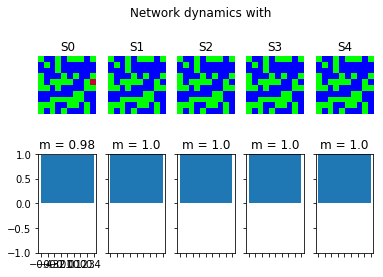

After having flip the 49 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


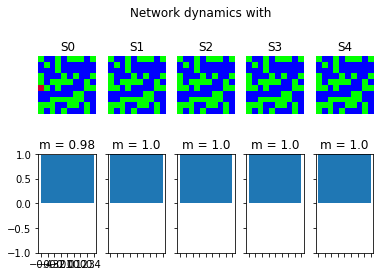

After having flip the 50 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


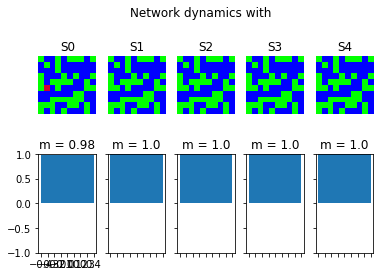

After having flip the 51 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


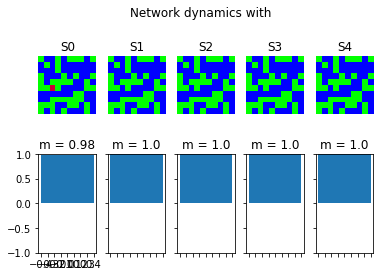

After having flip the 52 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


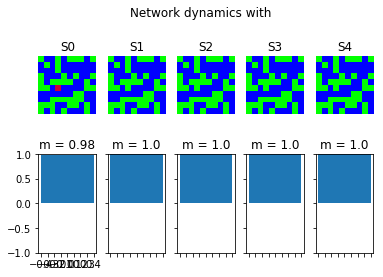

After having flip the 53 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


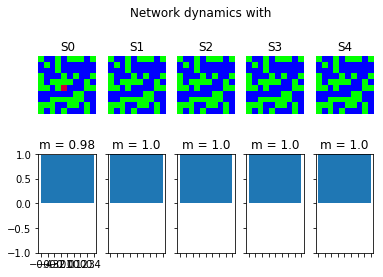

After having flip the 54 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


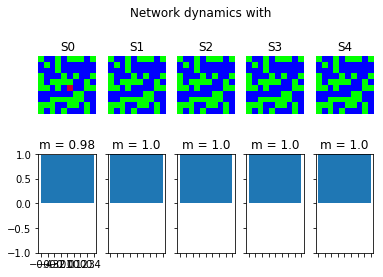

After having flip the 55 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


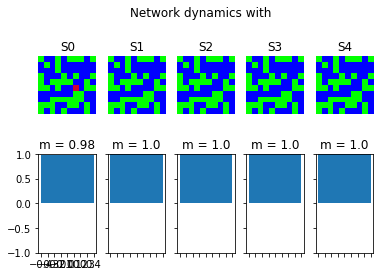

After having flip the 56 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


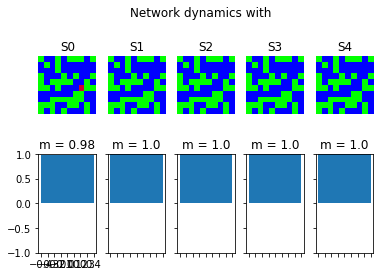

After having flip the 57 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


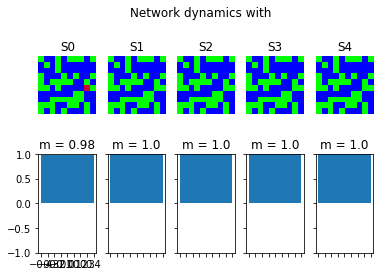

After having flip the 58 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


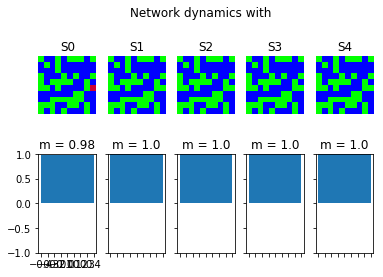

After having flip the 59 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


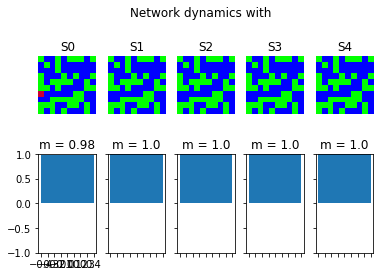

After having flip the 60 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


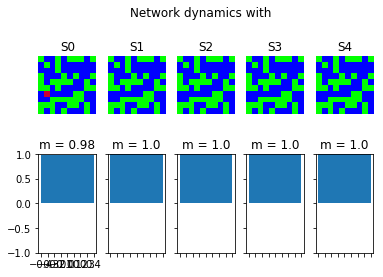

After having flip the 61 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


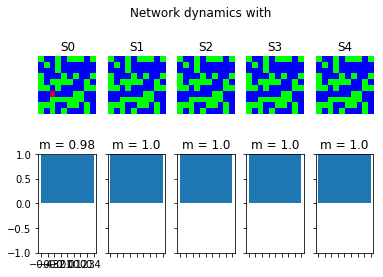

After having flip the 62 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


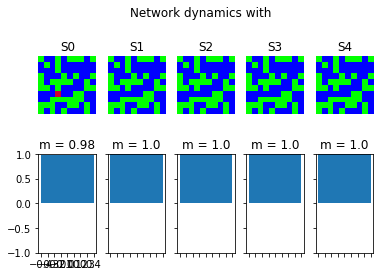

After having flip the 63 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


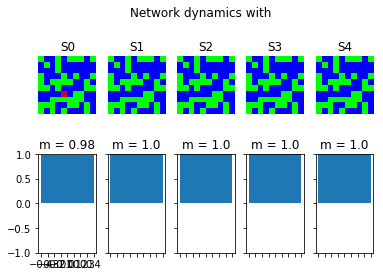

After having flip the 64 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


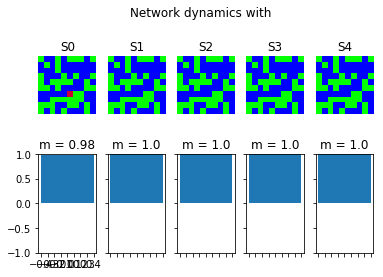

After having flip the 65 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


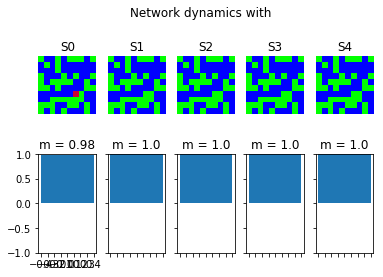

After having flip the 66 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


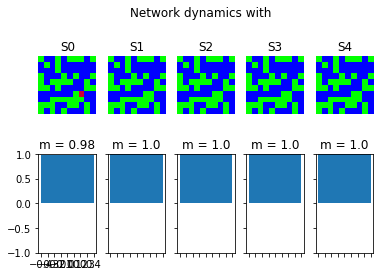

After having flip the 67 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


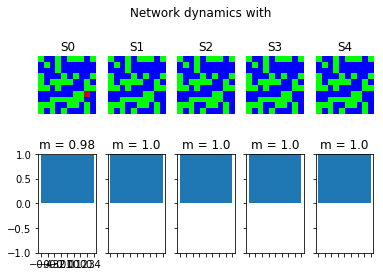

After having flip the 68 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


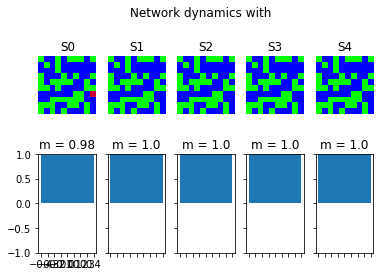

After having flip the 69 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


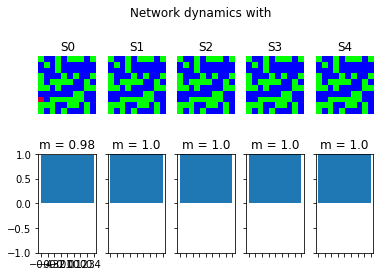

After having flip the 70 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


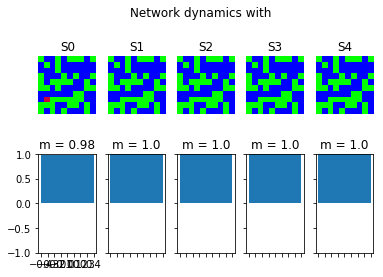

After having flip the 71 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


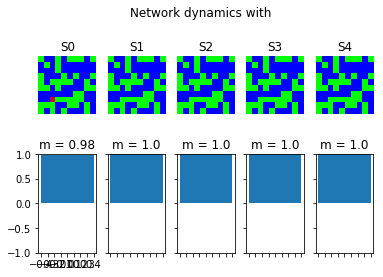

After having flip the 72 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


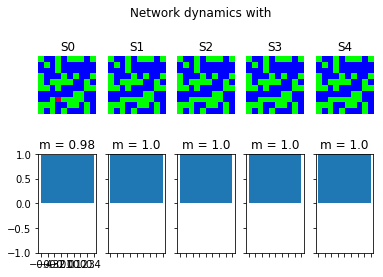

After having flip the 73 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


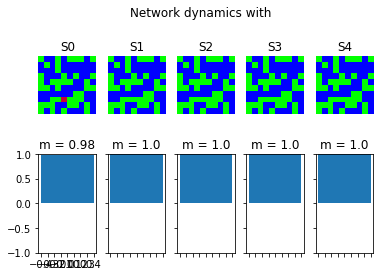

After having flip the 74 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


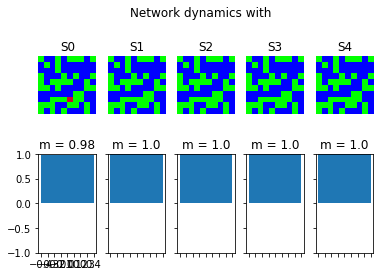

After having flip the 75 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


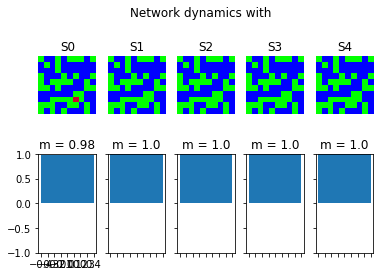

After having flip the 76 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


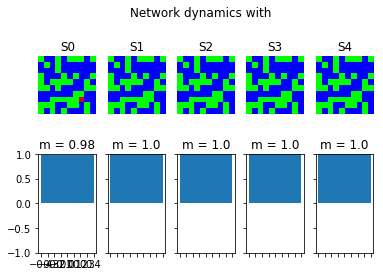

After having flip the 77 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


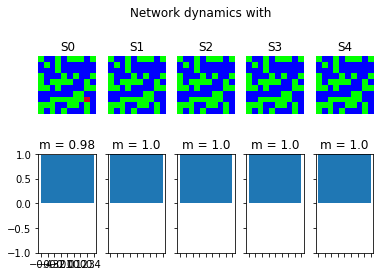

After having flip the 78 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


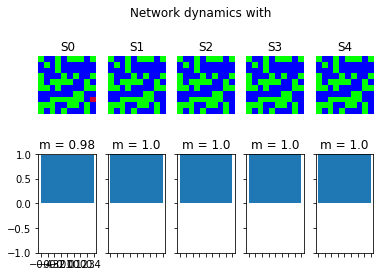

After having flip the 79 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


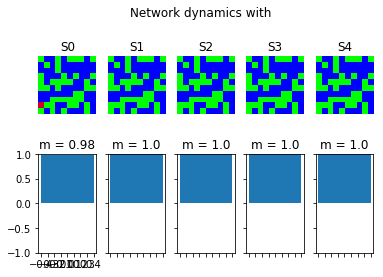

After having flip the 80 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


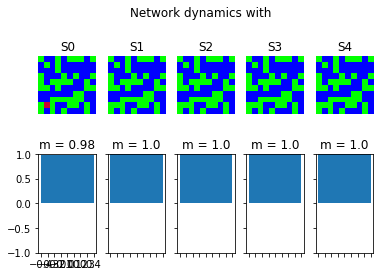

After having flip the 81 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


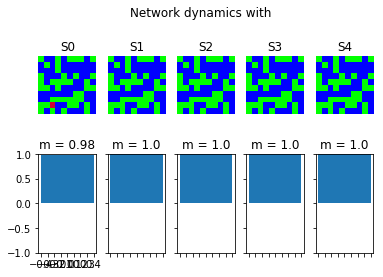

After having flip the 82 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


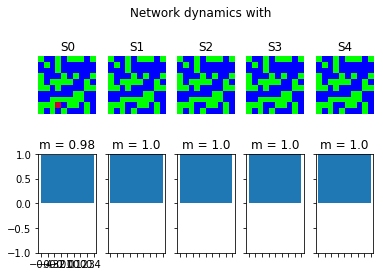

After having flip the 83 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


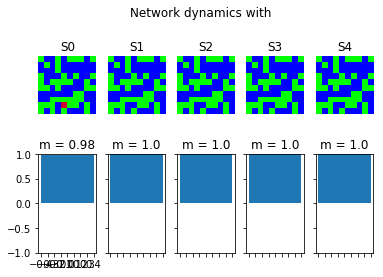

After having flip the 84 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


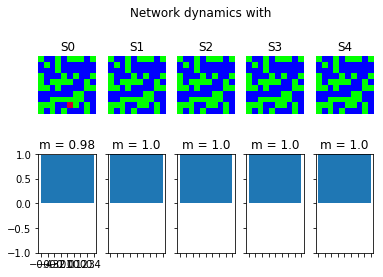

After having flip the 85 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


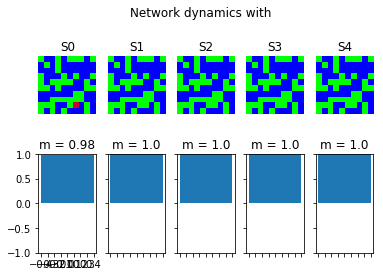

After having flip the 86 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


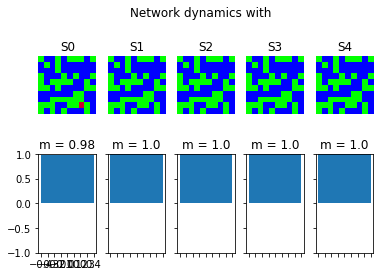

After having flip the 87 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


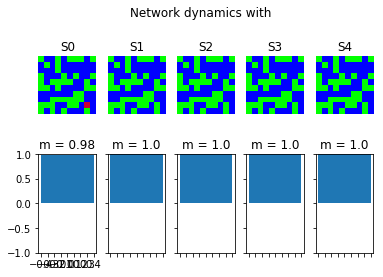

After having flip the 88 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


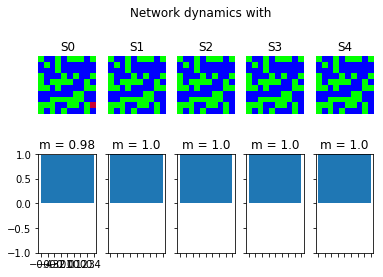

After having flip the 89 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


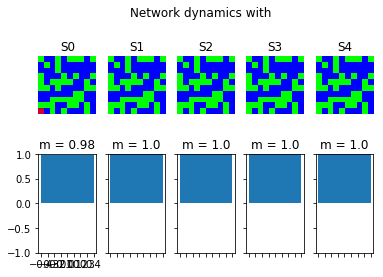

After having flip the 90 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


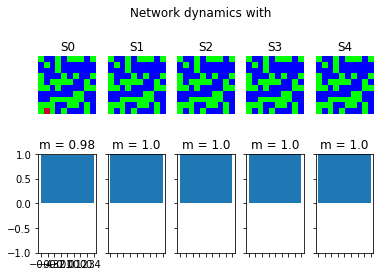

After having flip the 91 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


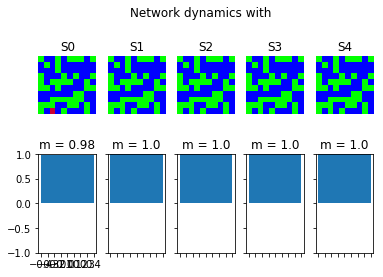

After having flip the 92 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


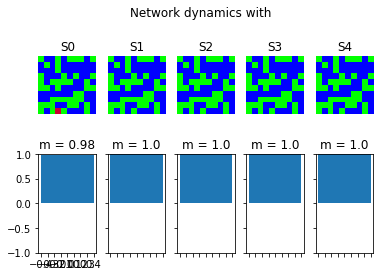

After having flip the 93 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


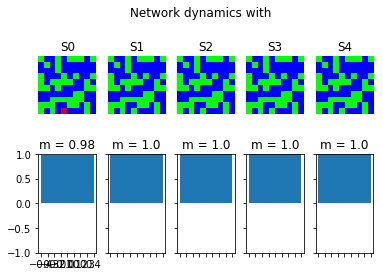

After having flip the 94 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


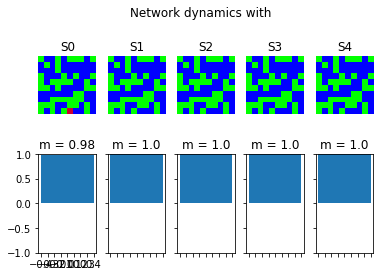

After having flip the 95 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


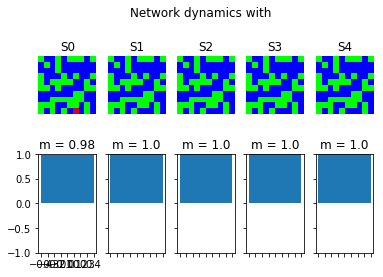

After having flip the 96 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


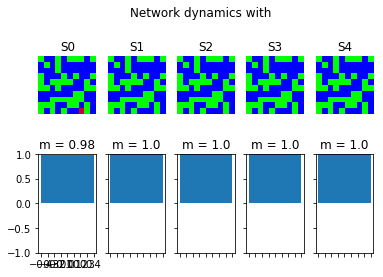

After having flip the 97 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


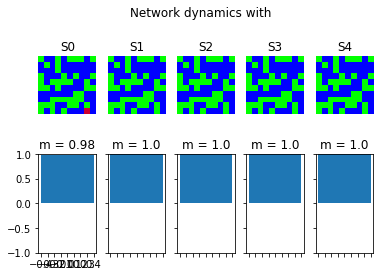

After having flip the 98 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


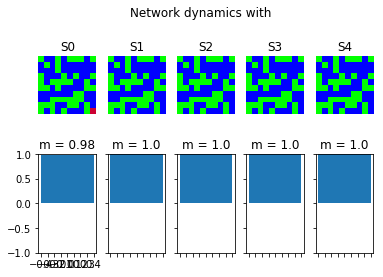

After having flip the 99 element of s_0, we have the following number of different pixels between S_0 and the final state :
0


In [71]:
# Function to flip one neuron
def flip_idx(template, idx):
    """
    makes a copy of the template pattern and flips the idx-th state.
    Args:
        template:
        nr_of_flips:
    Returns:
        a new pattern
    """
    linear_template = template.flatten()
    linear_template[idx] = -linear_template[idx]
    return linear_template.reshape(template.shape)


pattern_size = 10 
hopfield_net_s= network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_s.set_dynamics_sign_async()
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
pattern_list_s = []
pattern_list_s.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list_s)
hopfield_net_s.store_patterns(pattern_list_s)

s_0 = np.sign((sum(pattern_list_s)))
print('Sum of the 3 pattern : ')
plot_tools.plot_pattern_list([s_0])

# Flip all neurons one after the other
for i in range(0, pattern_size**2):
    
    s_0_flipped = flip_idx(s_0, i)
    hopfield_net_s.set_state_from_pattern(s_0_flipped)
    states_s = hopfield_net_s.run_with_monitoring(nr_steps=4)
    states_as_patterns = factory.reshape_patterns(states_s)
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, [s_0], reference_idx=0, suptitle="Network dynamics with")


    error=0
    final=states_as_patterns[-1]
    for j in range (len(s_0[0])):
        for k in range (len(s_0[1])):
            if (s_0[j][k] != final[j][k]):
                error = error +1
    print ('After having flip the {0} element of s_0, we have the following number of different pixels between S_0 and the final state :'.format(i))
    print (error)
    if error !=0 :
        print('STABILITY OF THE S0 IS NOT FOUND')
    



3 - What can you tell about the stability of $S_0$? Briefly comment (max 5 lines). 

***Hint:*** For help, refer to the pdf on associative memory on the MOODLE (https://moodle.epfl.ch/pluginfile.php/1091071/mod_resource/content/0/Lecture5/Hertz_Hopfield.pdf).

#### [6 points]

As we can see on the graph, just after one iteration, the stability of S0 is achieve when just one pixel is fliped. In fact, the network retrieve S0. This is true for the ensemble of all states that differ from  S0 in exactly one flip.

In fact, we could have predict that thanks to the question 8.7.2 where we have seen that we were in presence of local minima. Thanks to the graph, we can conclude that when we flip just one neuron we stay next to the local minima and thus it converge really fast to this minima. The initial state does not evolve towards other states. Thus quetion 8.7.2 and 8.7.4.1 are link and that make sense.

# revoir reponse car j'ai pas utilisé le truc de moodle. repopnse antoine et eve : 
It can be shown that a linear combination of an odd number of stored patterns is stable (it is a local minima).  This is proven in chapter 2 of "Cognitive Modeling" (https://moodle.epfl.ch/pluginfile.php/1091071/mod_resource/content/0/Lecture5/Hertz_Hopfield.pdf). 


## 8.7.5 Question.
Does your argumentation above hold in the case of $S_0 = sgn(\sum_{\mu}^2 \xi^{\mu})$? Why? (max 3 lines)
#### [3 points]

# reponse eve :
With an even number of patterns (for example 2), the sign of the sum can be 0 but can only be +/- 1 values. So the stability condition of  S0S0  is only valid with a linear combination of an odd number of stored patterns.

## 8.7.6 Exercise.
Use now the stochastic neuron with asynchronous update you implemented in 8.6.4. Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$. For $\beta$ varying in $\beta\in \left[1,2,8,10,100\right]$, plot the overlap of the network initialized with $S_0$ with each of the 3 stored patterns as a function of time. 

What do you observe? Comment on the stability of the spurious state $S_0$ in each case. (max 4 lines)

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5, number of steps = 9.

*** Hint 1: *** Make 4 plots (or 1 plot with 4 subplots), one for each value of $\beta$.

*** Hint 2: *** You can use the function pattern_tools.compute_overlap_list (or pattern_tools.compute_overlap).
#### [5 + 4 points]

In [ ]:
???

for j in range(0, len(betas)):
    
    
    ???
    
    
    # Compute
    
    
    # Plot

your answer